In [1]:
import numpy as np
import pandas as pd
import os, datetime
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
print('Tensorflow version: {}'.format(tf.__version__))

import matplotlib.pyplot as plt
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')
import yfinance as yf

Tensorflow version: 2.12.0


<ipython-input-1-d12b5409d92e>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
# Define the ticker symbol for Sensex
tickerSymbol = '^BSESN'
# Define the start and end date of the data to be extracted
startDate = '2012-01-01'
endDate = '2023-01-01'

In [3]:
df = yf.download(tickerSymbol, start=startDate, end=endDate)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,15640.559570,15970.309570,15640.559570,15939.360352,15939.360352,16200
2012-01-04,15967.490234,16004.690430,15822.320312,15882.639648,15882.639648,17800
2012-01-05,15893.070312,15980.169922,15809.309570,15857.080078,15857.080078,21200
2012-01-06,15789.080078,16001.309570,15664.910156,15867.730469,15867.730469,17200
2012-01-09,15840.219727,15871.509766,15678.299805,15814.719727,15814.719727,11200


In [5]:
df = df.resample('D').ffill()

In [6]:
df.head(14)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,15640.559570,15970.309570,15640.559570,15939.360352,15939.360352,16200
2012-01-04,15967.490234,16004.690430,15822.320312,15882.639648,15882.639648,17800
2012-01-05,15893.070312,15980.169922,15809.309570,15857.080078,15857.080078,21200
2012-01-06,15789.080078,16001.309570,15664.910156,15867.730469,15867.730469,17200
2012-01-07,15789.080078,16001.309570,15664.910156,15867.730469,15867.730469,17200
2012-01-08,15789.080078,16001.309570,15664.910156,15867.730469,15867.730469,17200
2012-01-09,15840.219727,15871.509766,15678.299805,15814.719727,15814.719727,11200
2012-01-10,15898.320312,16180.969727,15898.320312,16165.089844,16165.089844,19600
2012-01-11,16222.370117,16244.700195,16127.769531,16175.860352,16175.860352,18600


In [7]:
df.reset_index()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,15640.559570,15970.309570,15640.559570,15939.360352,15939.360352,16200
1,2012-01-04,15967.490234,16004.690430,15822.320312,15882.639648,15882.639648,17800
2,2012-01-05,15893.070312,15980.169922,15809.309570,15857.080078,15857.080078,21200
3,2012-01-06,15789.080078,16001.309570,15664.910156,15867.730469,15867.730469,17200
4,2012-01-07,15789.080078,16001.309570,15664.910156,15867.730469,15867.730469,17200
...,...,...,...,...,...,...,...
4010,2022-12-26,59755.078125,60833.781250,59754.101562,60566.421875,60566.421875,6500
4011,2022-12-27,60861.410156,60986.679688,60405.660156,60927.429688,60927.429688,11100
4012,2022-12-28,60811.519531,61075.328125,60713.769531,60910.281250,60910.281250,10000
4013,2022-12-29,60628.289062,61210.648438,60479.058594,61133.878906,61133.878906,7900


In [8]:
# Calculate daily returns of Sensex
df['Returns'] = np.log(df['Close']/df['Close'].shift(1))

In [9]:
# Calculate volatility (standard deviation of returns)
df['Volatility'] = df['Returns'].rolling(window=20).std() * np.sqrt(20)

In [10]:
df = df.resample('D').ffill()

In [11]:
df = df.dropna()

In [12]:
df.isnull().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Returns       0
Volatility    0
dtype: int64

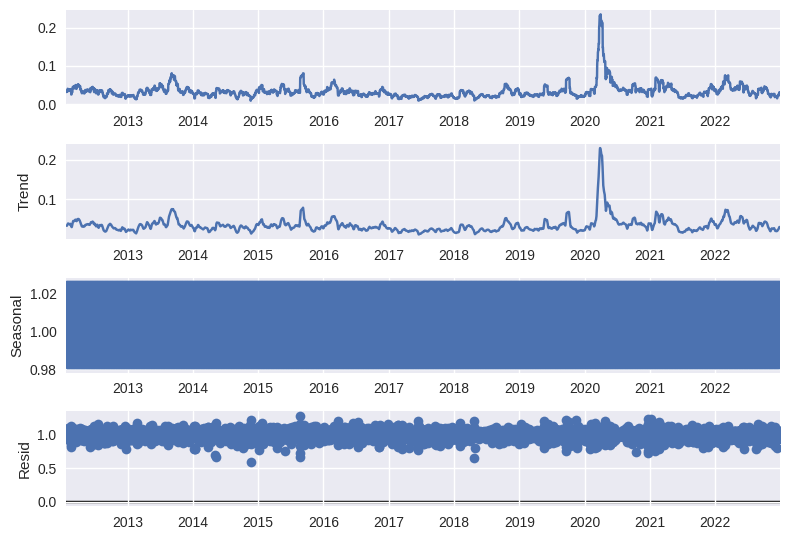

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

#df.set_index('Date', inplace=True)

analysis = df[['Volatility']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

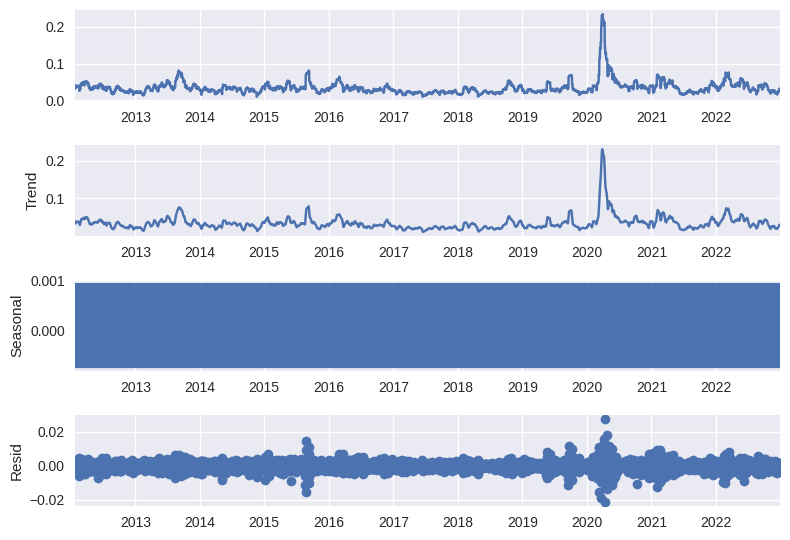

In [14]:

analysis = df[['Volatility']].copy()


decompose_result_add = seasonal_decompose(analysis, model="additive")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_add.plot();

In [15]:
df.reset_index('Date',inplace = True)

In [16]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

Text(0, 0.5, 'Salinity Surface')

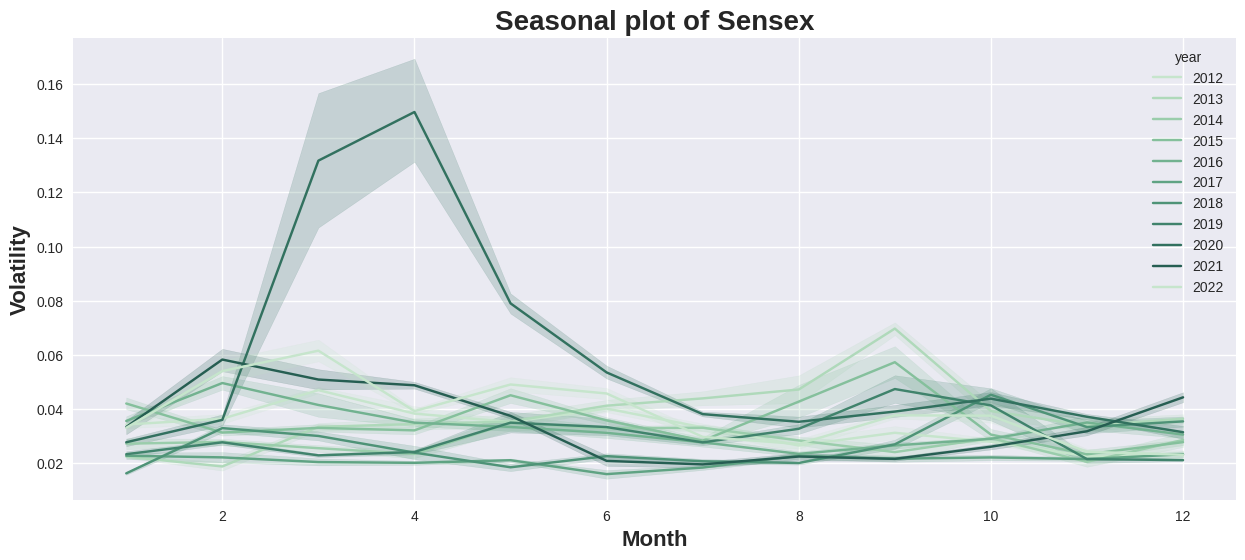

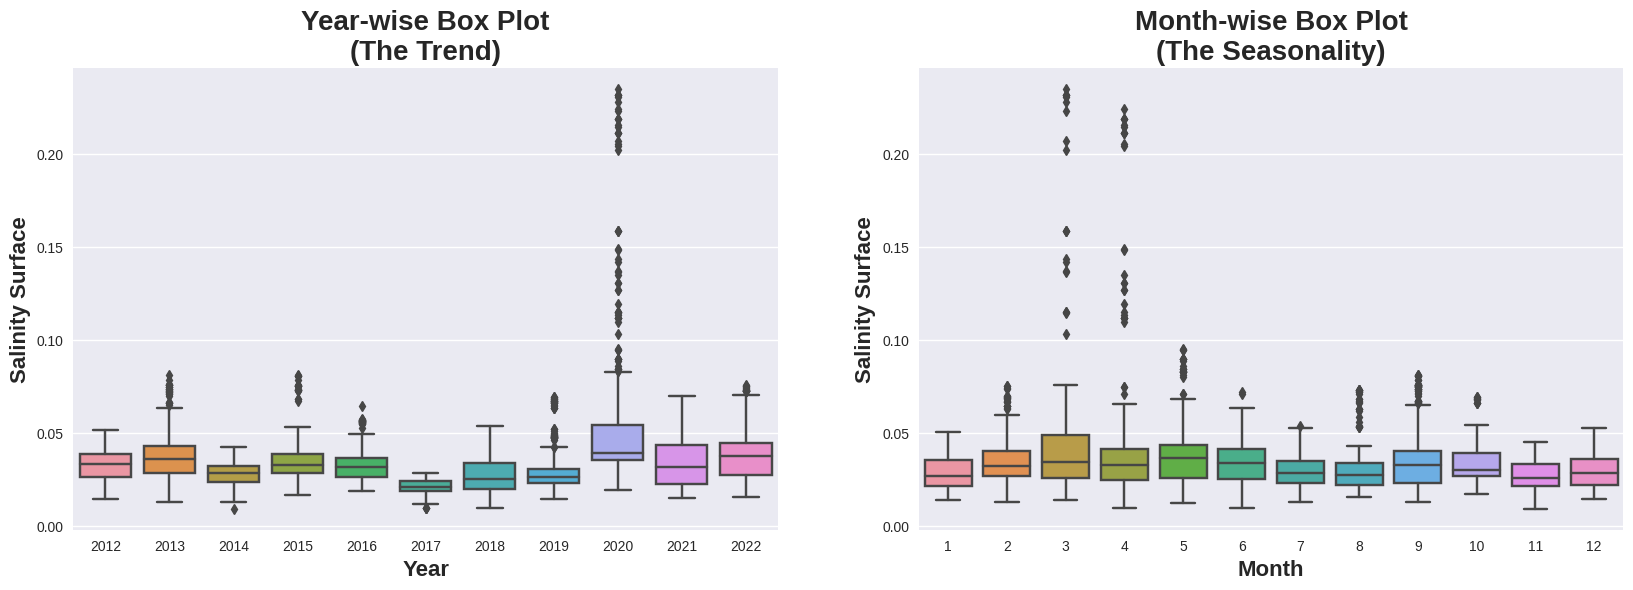

In [17]:
import seaborn as sns


fig, ax = plt.subplots(figsize=(15, 6))

palette = sns.color_palette("ch:2.5,-.2,dark=.3", 10)
sns.lineplot(x = df['month'], y = df['Volatility'], hue=df['year'], palette=palette)
ax.set_title('Seasonal plot of Sensex', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Volatility', fontsize = 16, fontdict=dict(weight='bold'))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

sns.boxplot(x = df['year'], y = df['Volatility'], ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Salinity Surface', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(x = df['month'], y = df['Volatility'], ax=ax[1])
ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Salinity Surface', fontsize = 16, fontdict=dict(weight='bold'))

#sns.boxplot(x = df['year'], y = df['Volatility'], ax=ax[0])
#ax[0].set_title('Year-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
#ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
#ax[0].set_ylabel('Salinity Surface', fontsize = 16, fontdict=dict(weight='bold'))

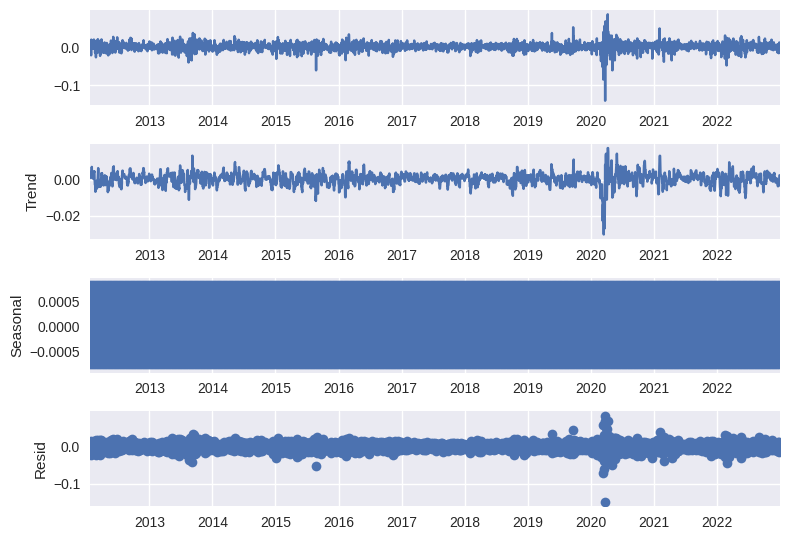

In [18]:
df.set_index('Date', inplace = True)
analysis = df[['Returns']].copy()


decompose_result_add = seasonal_decompose(analysis, model="additive")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_add.plot();

In [19]:
from scipy.stats import kruskal

def seasonality_test(series):
        seasoanl = False
        idx = np.arange(len(series.index)) % 12
        H_statistic, p_value = kruskal(series, idx)
        print(p_value)
        if p_value <= 0.05:
            seasonal = True
        return seasonal

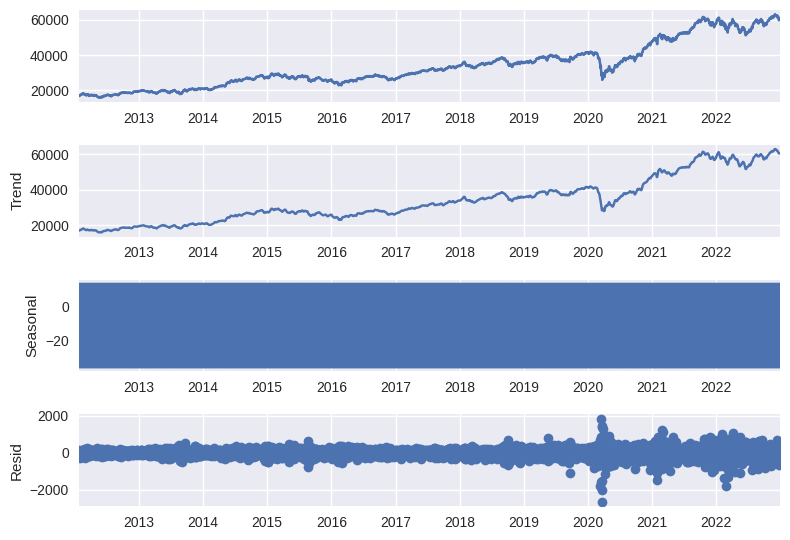

In [20]:
#df.set_index('Date', inplace = True)
analysis = df[['Close']].copy()


decompose_result_add = seasonal_decompose(analysis, model="additive")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_add.plot();

In [21]:
ser = df['Returns']
seasonality_test(ser)


0.0


True

In [22]:

ser1 = df['Volatility']
seasonality_test(ser1)

0.0


True

In [23]:
ser2 = df['Close']
seasonality_test(ser2)

0.0


True

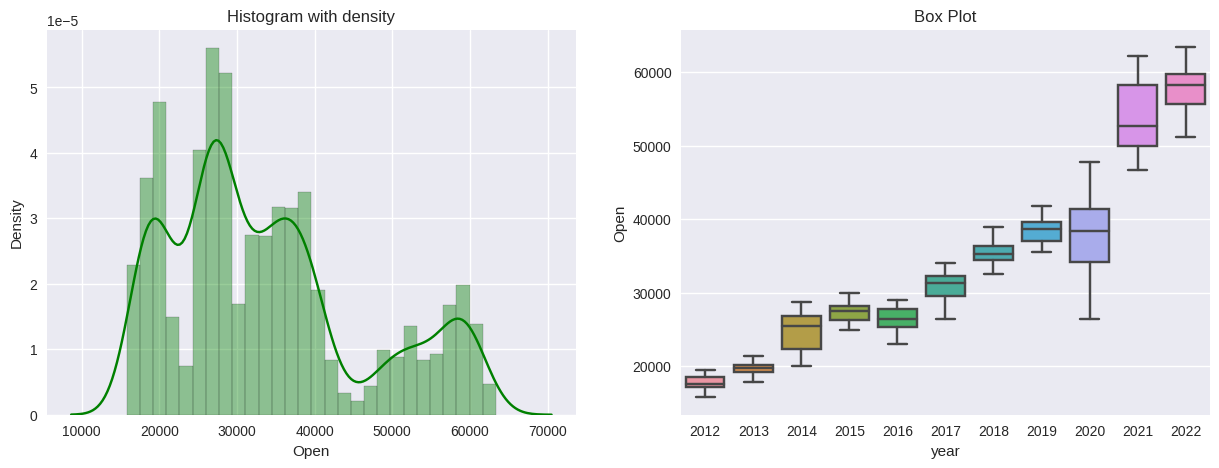

In [24]:
#sns.boxplot(df['Open'])
plt.figure(figsize = (15,5))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
sns.distplot(a=df.Open, color='green',
             hist_kws={"edgecolor": 'black'})
plt.title("Histogram with density")
plt.xlabel('Open')
plt.ylabel('Density')

plt.subplot(1, 2, 2) # index 2
sns.boxplot(x = df['year'], y = df["Open"])
plt.title("Box Plot")
#plt.xlabel('X-axis ')
#plt.ylabel('Y-axis ')

plt.show()

 

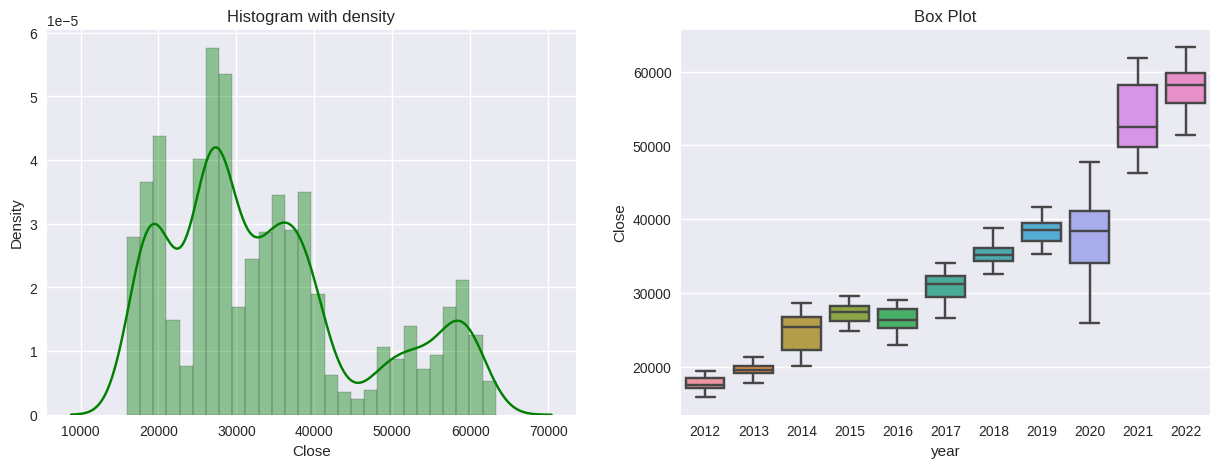

In [25]:
#sns.boxplot(df['Close'])
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
sns.distplot(a=df.Close, color='green',
             hist_kws={"edgecolor": 'black'})
plt.title("Histogram with density")
plt.xlabel('Close')
plt.ylabel('Density')

plt.subplot(1, 2, 2) # index 2
sns.boxplot(x = df['year'], y = df["Close"])
plt.title("Box Plot")
#plt.xlabel('X-axis ')
#plt.ylabel('Y-axis ')

plt.show()

In [26]:
newdf = df[(df.Open > 60000)]

In [27]:
newdf

,Open,High,Low,Close,Adj Close,Volume,Returns,Volatility,year,month
Date,,,,,,,,,,
2021-09-24,60158.761719,60333.000000,59946.550781,60048.468750,60048.468750,10900,0.002720,0.023163,2021,9
2021-09-25,60158.761719,60333.000000,59946.550781,60048.468750,60048.468750,10900,0.000000,0.023163,2021,9
2021-09-26,60158.761719,60333.000000,59946.550781,60048.468750,60048.468750,10900,0.000000,0.023179,2021,9
2021-09-27,60303.789062,60412.320312,59887.191406,60077.878906,60077.878906,6200,0.000490,0.023128,2021,9
2021-09-28,60285.890625,60288.441406,59045.531250,59667.601562,59667.601562,21100,-0.006853,0.024541,2021,9
...,...,...,...,...,...,...,...,...,...,...
2022-12-25,60205.558594,60546.878906,59765.558594,59845.289062,59845.289062,8100,0.000000,0.027156,2022,12
2022-12-27,60861.410156,60986.679688,60405.660156,60927.429688,60927.429688,11100,0.005943,0.031561,2022,12
2022-12-28,60811.519531,61075.328125,60713.769531,60910.281250,60910.281250,10000,-0.000281,0.031332,2022,12


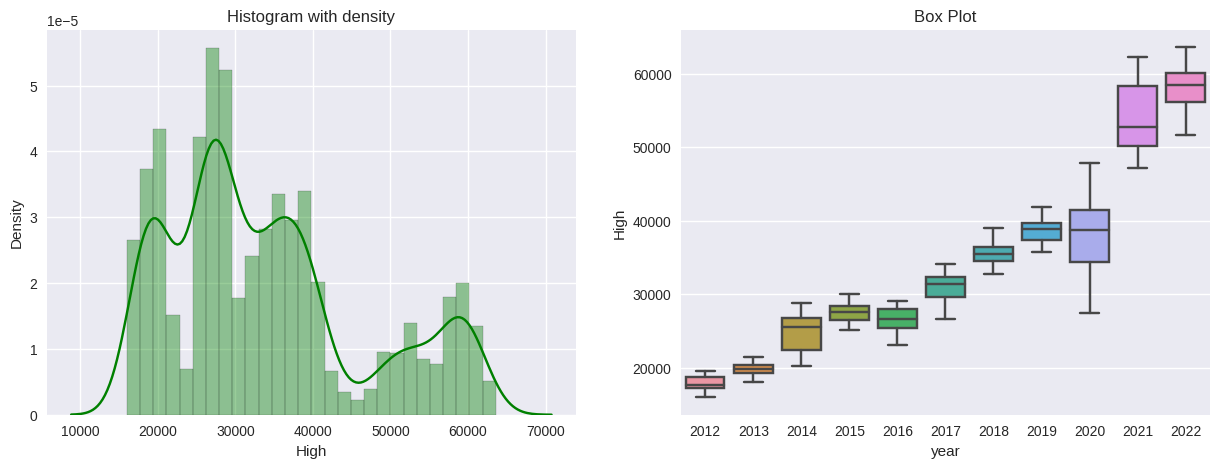

In [28]:
#sns.boxplot(df['Close'])
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
sns.distplot(a=df.High, color='green',
             hist_kws={"edgecolor": 'black'})
plt.title("Histogram with density")
plt.xlabel('High')
plt.ylabel('Density')

plt.subplot(1, 2, 2) # index 2
sns.boxplot(x = df['year'], y = df["High"])
plt.title("Box Plot")
#plt.xlabel('X-axis ')
#plt.ylabel('Y-axis ')

plt.show()

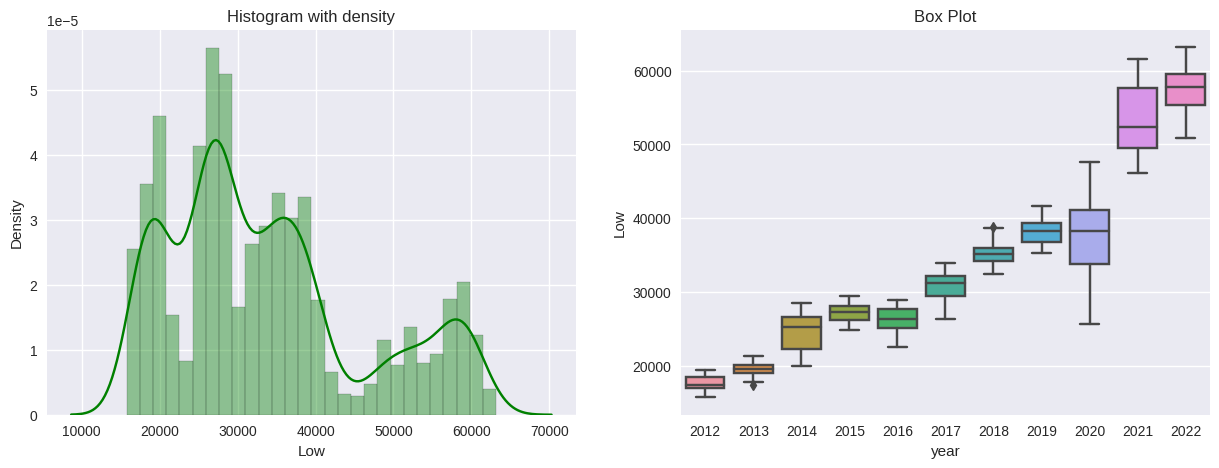

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
sns.distplot(a=df.Low, color='green',
             hist_kws={"edgecolor": 'black'})
plt.title("Histogram with density")
plt.xlabel('Low')
plt.ylabel('Density')

plt.subplot(1, 2, 2) # index 2
sns.boxplot(x = df['year'], y = df["Low"])
plt.title("Box Plot")
#plt.xlabel('X-axis ')
#plt.ylabel('Y-axis ')

plt.show()

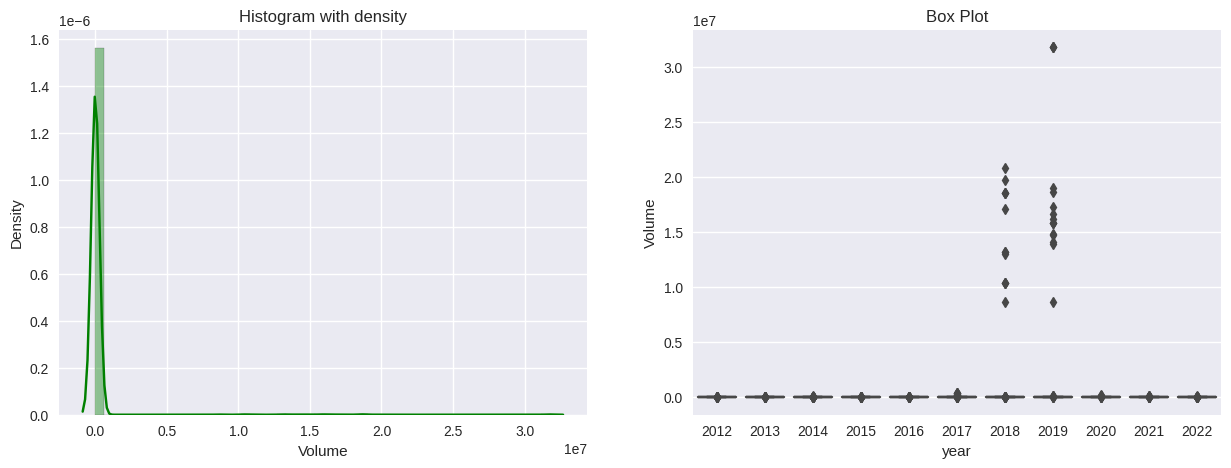

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
sns.distplot(a=df.Volume, color='green',
             hist_kws={"edgecolor": 'black'})
plt.title("Histogram with density")
plt.xlabel('Volume')
plt.ylabel('Density')

plt.subplot(1, 2, 2) # index 2
sns.boxplot(x = df['year'], y = df["Volume"])
plt.title("Box Plot")
#plt.xlabel('X-axis ')
#plt.ylabel('Y-axis ')

plt.show()

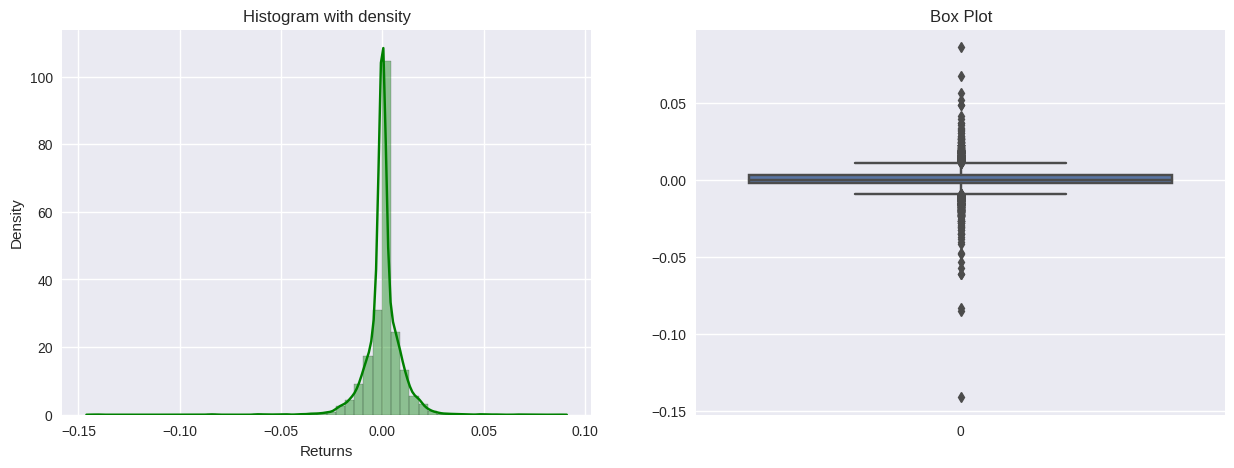

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
sns.distplot(a=df.Returns, color='green',
             hist_kws={"edgecolor": 'black'})
plt.title("Histogram with density")
plt.xlabel('Returns')
plt.ylabel('Density')

plt.subplot(1, 2, 2) # index 2
sns.boxplot(df["Returns"])
plt.title("Box Plot")
#plt.xlabel('X-axis ')
#plt.ylabel('Y-axis ')

plt.show()

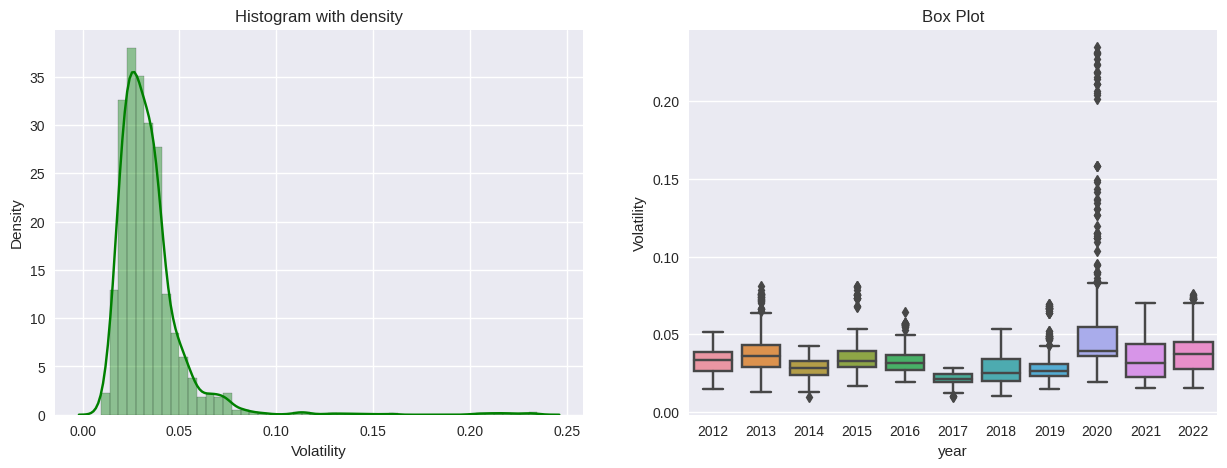

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
sns.distplot(a=df.Volatility, color='green',
             hist_kws={"edgecolor": 'black'})
plt.title("Histogram with density")
plt.xlabel('Volatility')
plt.ylabel('Density')

plt.subplot(1, 2, 2) # index 2
sns.boxplot(x = df['year'], y = df["Volatility"])
plt.title("Box Plot")
#plt.xlabel('X-axis ')
#plt.ylabel('Y-axis ')

plt.show()

<Axes: xlabel='Date', ylabel='Returns'>

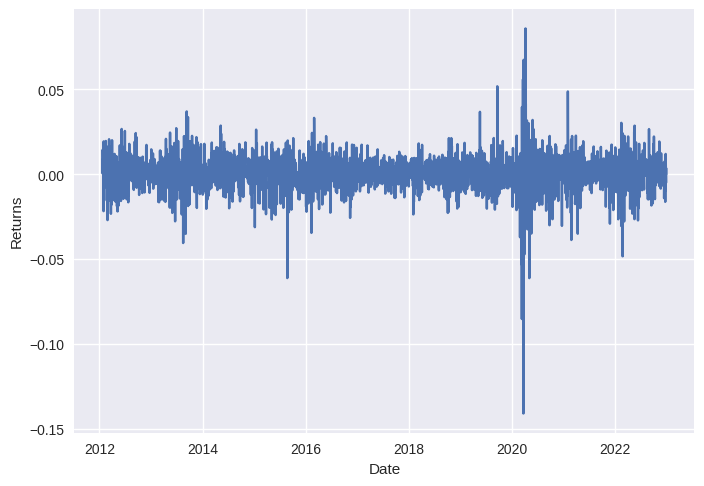

In [33]:
sns.lineplot(df['Returns'])

<Axes: xlabel='Date'>

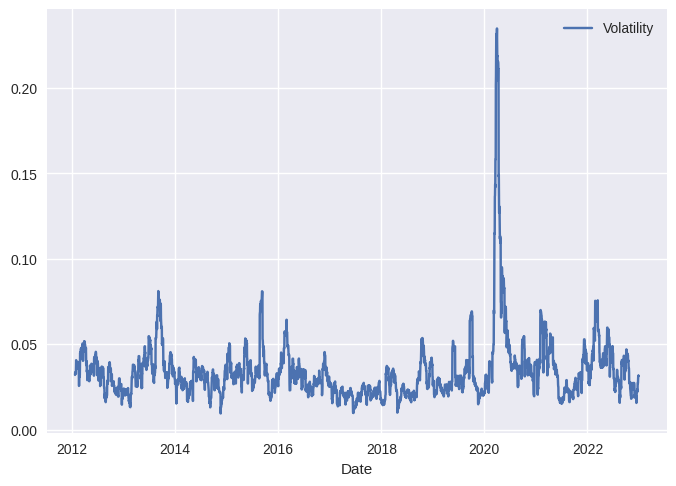

In [34]:
sns.lineplot([df['Volatility']])

<Axes: xlabel='Date'>

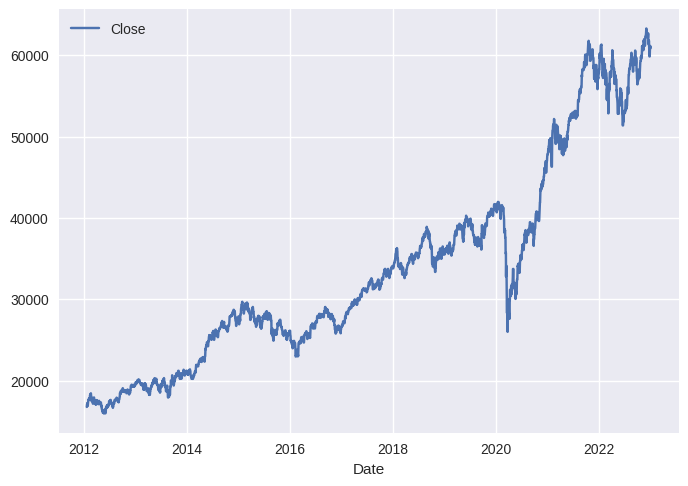

In [35]:
sns.lineplot([df['Close']])

In [36]:
from statsmodels.tsa.stattools import adfuller

In [37]:
adf_test = adfuller(df['Returns'])

In [38]:
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -15.736860
p-value: 0.000000


In [39]:
adf_test = adfuller(df['Close'])

In [40]:
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: 0.118121
p-value: 0.967277


In [41]:
adf_test = adfuller(df['Volatility'])

In [42]:
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -6.354582
p-value: 0.000000


In [43]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
#series = read_csv('stationary.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


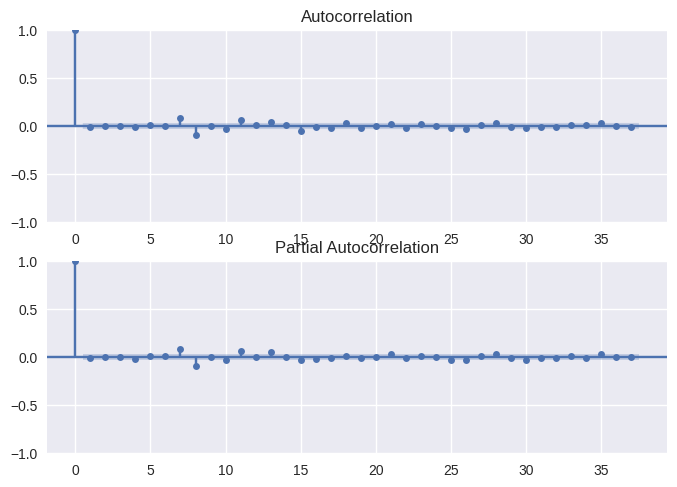

In [44]:
pyplot.figure()
pyplot.subplot(211)
plot_acf(df['Returns'], ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(df['Returns'], ax=pyplot.gca())
pyplot.show()

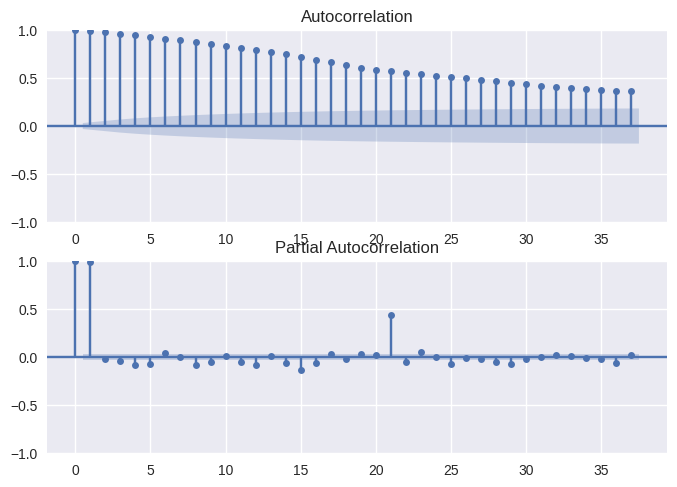

In [45]:
pyplot.figure()
pyplot.subplot(211)
plot_acf(df['Volatility'], ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(df['Volatility'], ax=pyplot.gca())
pyplot.show()

As we know the stock prices are highly volatile and prices change quickly with time. To observe any trend or pattern we can take the help of a 50-day 200-day average


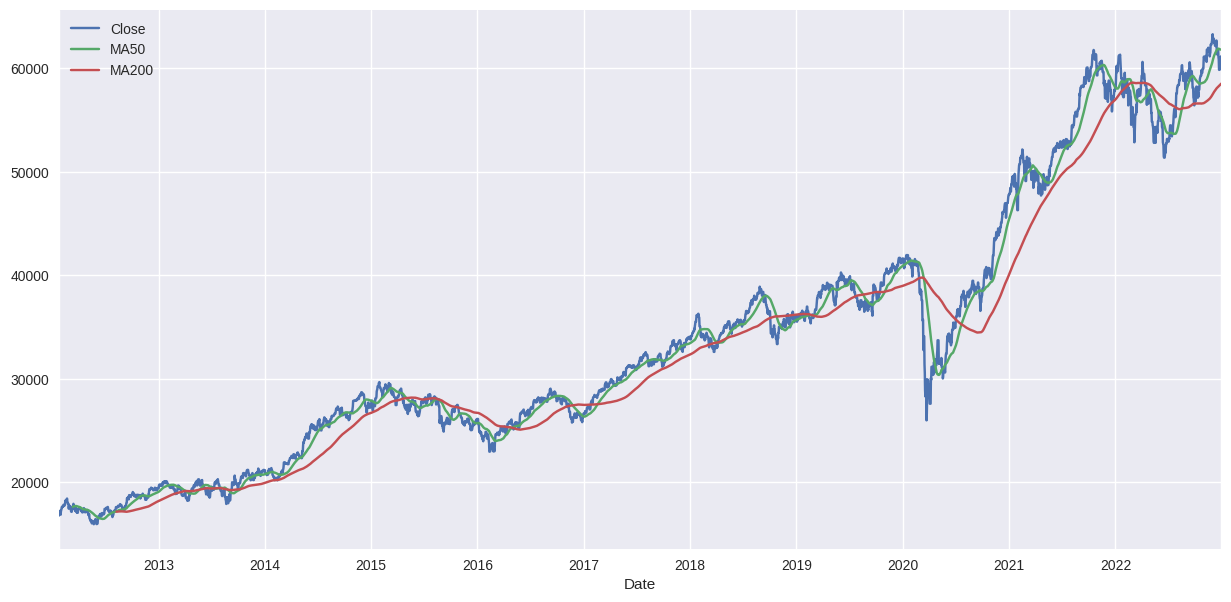

In [46]:
df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()
df['Close'].plot(figsize = (15,7))
df['MA50'].plot()
df['MA200'].plot()
plt.legend()

A percentage increase in stock value is the change in stock comparing that to the previous day. The bigger the value either positive or negative the volatile the stock is.

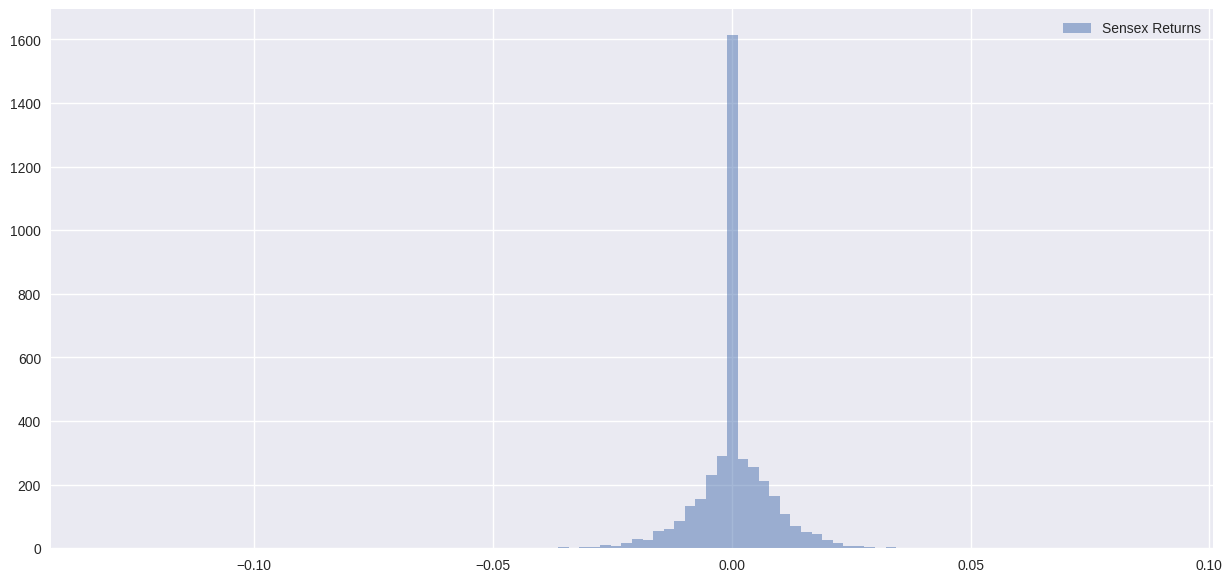

In [47]:
#Volatility
df['Returns'] = (df['Close']/df['Close'].shift(1)) -1
df['Returns'].hist(bins = 100, label = 'Sensex Returns', alpha = 0.5, figsize = (15,7))
plt.legend()

In [48]:
df['Day_Perc_Change'] = df['Adj Close'].pct_change()*100

In [50]:
def trend(x):
  if x > -0.5 and x <= 0.5:
    return 'Slight or No change'
  elif x > 0.5 and x <= 1:
    return 'Slight Positive'
  elif x > -1 and x <= -0.5:
    return 'Slight Negative'
  elif x > 1 and x <= 3:
    return 'Positive'
  elif x > -3 and x <= -1:
    return 'Negative'
  elif x > 3 and x <= 7:
    return 'Among top gainers'
  elif x > -7 and x <= -3:
    return 'Among top losers'
  elif x > 7:
    return 'Bull run'
  elif x <= -7:
    return 'Bear drop'
df['Trend']= (df['Day_Perc_Change'].count())
df['Trend']= df['Day_Perc_Change'].apply(lambda x:trend(x))
df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Volatility,year,month,MA50,MA200,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,
2012-01-23,16667.019531,16784.000000,16659.320312,16751.730469,16751.730469,15000,NaN,0.031978,2012,1,NaN,NaN,NaN,None
2012-01-24,16806.720703,17050.320312,16770.009766,16995.769531,16995.769531,18200,0.014568,0.033436,2012,1,NaN,NaN,1.456799,Positive
2012-01-25,17068.849609,17130.240234,17016.689453,17077.179688,17077.179688,14000,0.004790,0.033039,2012,1,NaN,NaN,0.479002,Slight or No change
2012-01-26,17068.849609,17130.240234,17016.689453,17077.179688,17077.179688,14000,0.000000,0.033111,2012,1,NaN,NaN,0.000000,Slight or No change
2012-01-27,17201.330078,17258.970703,17106.570312,17233.980469,17233.980469,17200,0.009182,0.033304,2012,1,NaN,NaN,0.918189,Slight Positive


In [51]:
df = df.dropna()

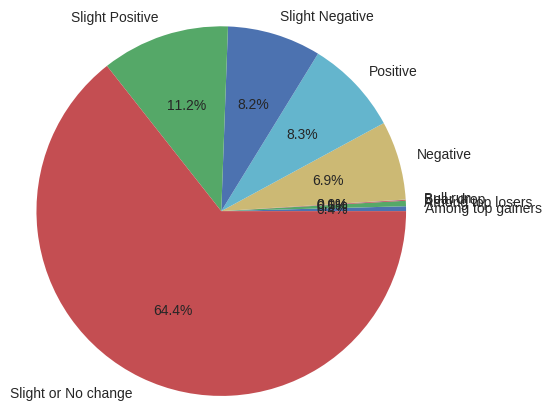

In [52]:
plt.figure(figsize = (5,3))
pie_data = df.groupby('Trend')
pie_label = sorted([i for i in df.loc[:, 'Trend'].unique()])
plt.pie(pie_data['Trend'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 2)

plt.show()

In [53]:
df

,Open,High,Low,Close,Adj Close,Volume,Returns,Volatility,year,month,MA50,MA200,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,
2012-08-09,17612.080078,17702.980469,17516.990234,17560.869141,17560.869141,14600,-0.002255,0.035497,2012,8,17206.563125,17158.759370,-0.225512,Slight or No change
2012-08-10,17515.419922,17590.609375,17471.369141,17557.740234,17557.740234,13600,-0.000178,0.035503,2012,8,17217.066719,17162.789419,-0.017817,Slight or No change
2012-08-11,17515.419922,17590.609375,17471.369141,17557.740234,17557.740234,13600,0.000000,0.035503,2012,8,17228.771328,17165.599272,0.000000,Slight or No change
2012-08-12,17515.419922,17590.609375,17471.369141,17557.740234,17557.740234,13600,0.000000,0.030314,2012,8,17240.475937,17168.002075,0.000000,Slight or No change
2012-08-13,17551.689453,17642.380859,17522.099609,17633.449219,17633.449219,9000,0.004312,0.030401,2012,8,17253.694727,17170.783423,0.431200,Slight or No change
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,59755.078125,60833.781250,59754.101562,60566.421875,60566.421875,6500,0.012050,0.030709,2022,12,61813.426484,58364.480508,1.204995,Positive
2022-12-27,60861.410156,60986.679688,60405.660156,60927.429688,60927.429688,11100,0.005961,0.031561,2022,12,61808.272109,58397.600449,0.596053,Slight Positive
2022-12-28,60811.519531,61075.328125,60713.769531,60910.281250,60910.281250,10000,-0.000281,0.031332,2022,12,61802.774766,58430.634648,-0.028146,Slight or No change


In [54]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 3.3 MB/s eta 0:00:00


In [55]:
import mplfinance as mpf

KeyError: ignored

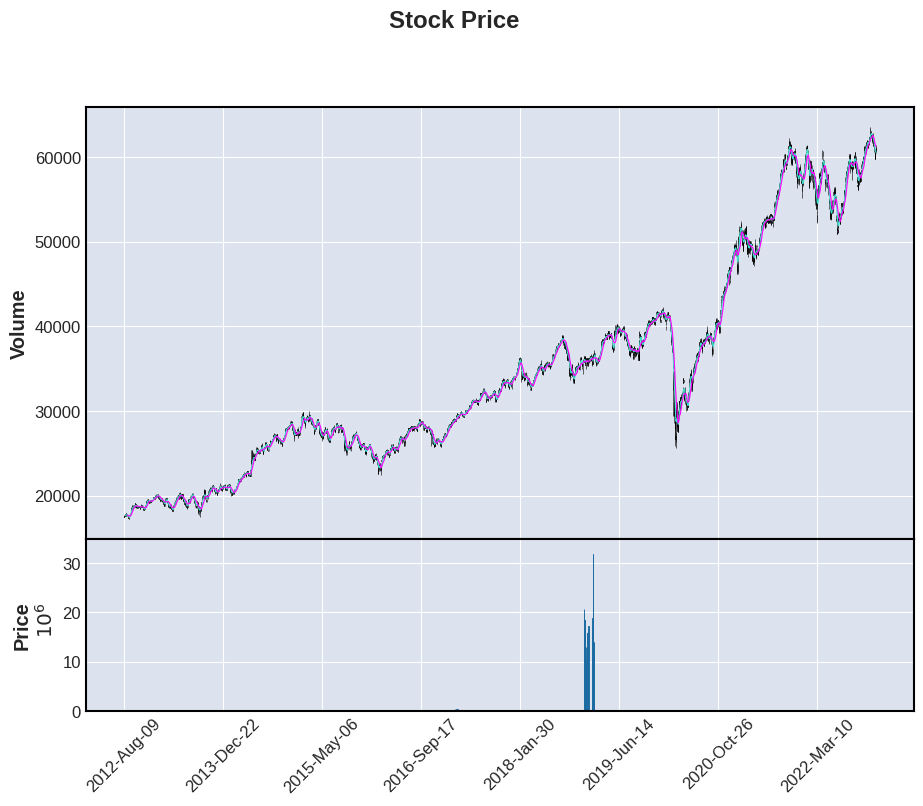

In [57]:
# Create a dictionary to specify the formatting for the candlestick graph
kwargs = dict(
    type='candle',
    mav=(10, 20),  # Moving averages to be displayed on the graph
    volume=True,  # Show volume bars
    title='Stock Price',
    ylabel= 'Volume',
    ylabel_lower= 'Price',
    figratio=(20, 15),  # Figure size ratio
    figscale=1.5  # Scaling factor for the figure
)

# Plot the candlestick graph
mpf.plot(df, **kwargs)

Daily Returns and Volume
 it was observed that whenever the volume of shares traded is high, there is comparatively high rise or fall in the price of the stock leading to the high returns.

In [58]:
df = df.reset_index()

In [59]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Volatility,year,month,MA50,MA200,Day_Perc_Change,Trend
0,2012-08-09,17612.080078,17702.980469,17516.990234,17560.869141,17560.869141,14600,-0.002255,0.035497,2012,8,17206.563125,17158.759370,-0.225512,Slight or No change
1,2012-08-10,17515.419922,17590.609375,17471.369141,17557.740234,17557.740234,13600,-0.000178,0.035503,2012,8,17217.066719,17162.789419,-0.017817,Slight or No change
2,2012-08-11,17515.419922,17590.609375,17471.369141,17557.740234,17557.740234,13600,0.000000,0.035503,2012,8,17228.771328,17165.599272,0.000000,Slight or No change
3,2012-08-12,17515.419922,17590.609375,17471.369141,17557.740234,17557.740234,13600,0.000000,0.030314,2012,8,17240.475937,17168.002075,0.000000,Slight or No change
4,2012-08-13,17551.689453,17642.380859,17522.099609,17633.449219,17633.449219,9000,0.004312,0.030401,2012,8,17253.694727,17170.783423,0.431200,Slight or No change
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,2022-12-26,59755.078125,60833.781250,59754.101562,60566.421875,60566.421875,6500,0.012050,0.030709,2022,12,61813.426484,58364.480508,1.204995,Positive
3792,2022-12-27,60861.410156,60986.679688,60405.660156,60927.429688,60927.429688,11100,0.005961,0.031561,2022,12,61808.272109,58397.600449,0.596053,Slight Positive
3793,2022-12-28,60811.519531,61075.328125,60713.769531,60910.281250,60910.281250,10000,-0.000281,0.031332,2022,12,61802.774766,58430.634648,-0.028146,Slight or No change
3794,2022-12-29,60628.289062,61210.648438,60479.058594,61133.878906,61133.878906,7900,0.003671,0.031269,2022,12,61804.781328,58464.786836,0.367093,Slight or No change


In [61]:
#Moving Average Indicators
df['MA20'] = df['Close'].rolling(20).mean()
df['STD20'] = df['Close'].rolling(20).std()
df['MA150'] = df['Close'].rolling(150).mean()

In [62]:
#Bollinger Bands
df['lower_band'] = df['MA20'] - 2*df['STD20']
df['upper_band'] = df['MA20'] + 2*df['STD20']
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Volatility,year,month,MA50,MA200,Day_Perc_Change,Trend,MA20,STD20,MA150,lower_band,upper_band
0,2012-08-09,17612.080078,17702.980469,17516.990234,17560.869141,17560.869141,14600,-0.002255,0.035497,2012,8,17206.563125,17158.759370,-0.225512,Slight or No change,NaN,NaN,NaN,NaN,NaN
1,2012-08-10,17515.419922,17590.609375,17471.369141,17557.740234,17557.740234,13600,-0.000178,0.035503,2012,8,17217.066719,17162.789419,-0.017817,Slight or No change,NaN,NaN,NaN,NaN,NaN
2,2012-08-11,17515.419922,17590.609375,17471.369141,17557.740234,17557.740234,13600,0.000000,0.035503,2012,8,17228.771328,17165.599272,0.000000,Slight or No change,NaN,NaN,NaN,NaN,NaN
3,2012-08-12,17515.419922,17590.609375,17471.369141,17557.740234,17557.740234,13600,0.000000,0.030314,2012,8,17240.475937,17168.002075,0.000000,Slight or No change,NaN,NaN,NaN,NaN,NaN
4,2012-08-13,17551.689453,17642.380859,17522.099609,17633.449219,17633.449219,9000,0.004312,0.030401,2012,8,17253.694727,17170.783423,0.431200,Slight or No change,NaN,NaN,NaN,NaN,NaN


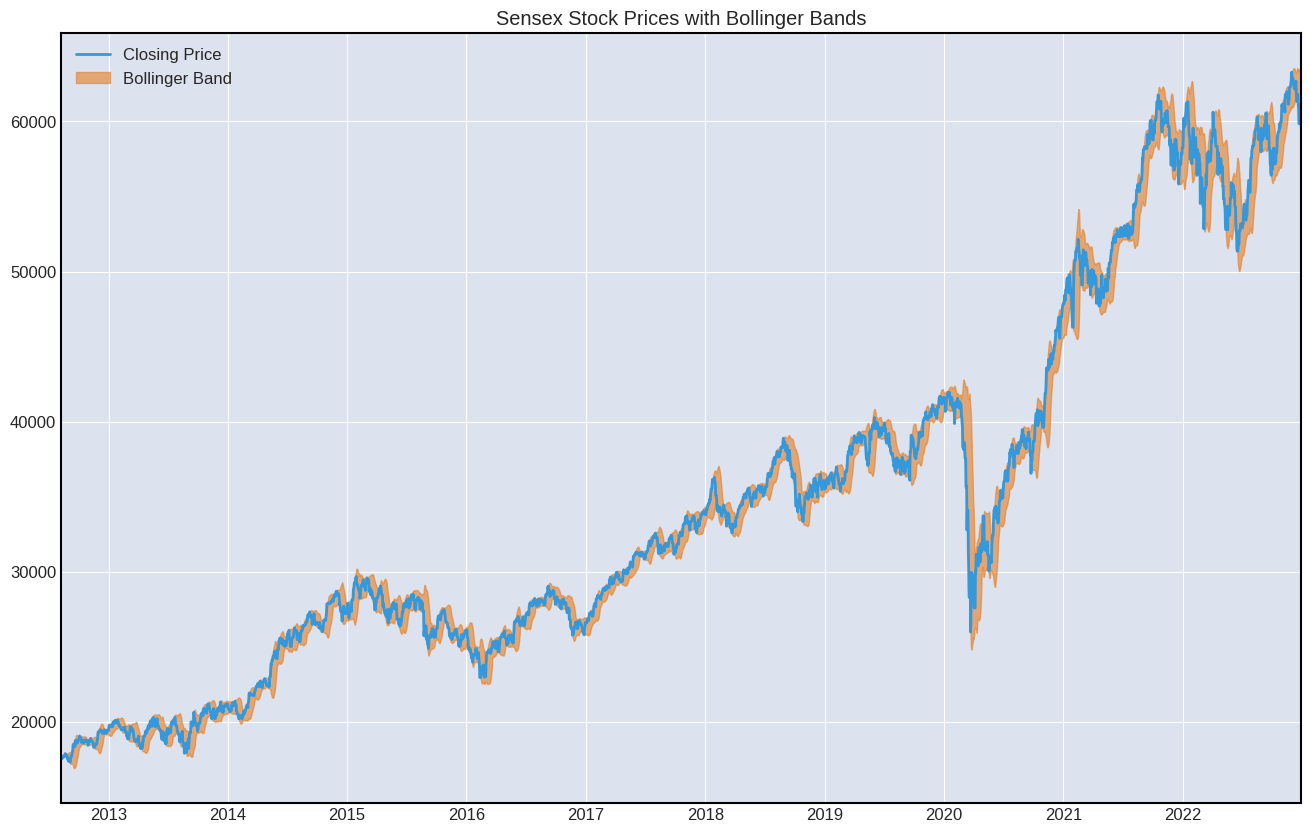

In [63]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(df['Date'], df['Close'],label="Closing Price", color="#3498db")
ax.fill_between(df['Date'], df['upper_band'], df['lower_band'], color='#e67e22', alpha=0.6, label="Bollinger Band")
ax.set_title('Sensex Stock Prices with Bollinger Bands')
ax.set_xlim(df['Date'].min(), df['Date'].max())
plt.legend();

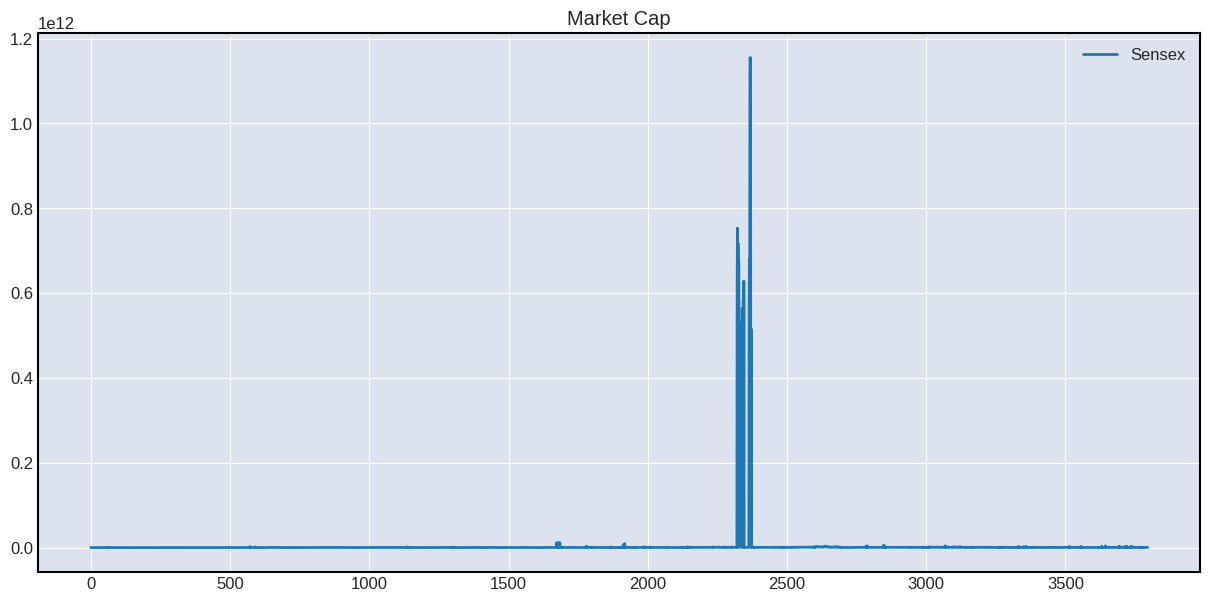

In [64]:
#Market Capitalisation
df['MarktCap'] = df['Open'] * df['Volume']
df['MarktCap'].plot(label = 'Sensex', figsize = (15,7))
plt.title('Market Cap')
plt.legend()

In [65]:
df = df.reset_index()

In [66]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [67]:
df

,index,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Volatility,...,Day_Perc_Change,Trend,MA20,STD20,MA150,lower_band,upper_band,MarktCap,Year,Month
0,0,2012-08-09,17612.080078,17702.980469,17516.990234,17560.869141,17560.869141,14600,-0.002255,0.035497,...,-0.225512,Slight or No change,NaN,NaN,NaN,NaN,NaN,2.571364e+08,2012,8
1,1,2012-08-10,17515.419922,17590.609375,17471.369141,17557.740234,17557.740234,13600,-0.000178,0.035503,...,-0.017817,Slight or No change,NaN,NaN,NaN,NaN,NaN,2.382097e+08,2012,8
2,2,2012-08-11,17515.419922,17590.609375,17471.369141,17557.740234,17557.740234,13600,0.000000,0.035503,...,0.000000,Slight or No change,NaN,NaN,NaN,NaN,NaN,2.382097e+08,2012,8
3,3,2012-08-12,17515.419922,17590.609375,17471.369141,17557.740234,17557.740234,13600,0.000000,0.030314,...,0.000000,Slight or No change,NaN,NaN,NaN,NaN,NaN,2.382097e+08,2012,8
4,4,2012-08-13,17551.689453,17642.380859,17522.099609,17633.449219,17633.449219,9000,0.004312,0.030401,...,0.431200,Slight or No change,NaN,NaN,NaN,NaN,NaN,1.579652e+08,2012,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,3791,2022-12-26,59755.078125,60833.781250,59754.101562,60566.421875,60566.421875,6500,0.012050,0.030709,...,1.204995,Positive,61509.241992,924.828984,59898.093151,59659.584025,63358.899960,3.884080e+08,2022,12
3792,3792,2022-12-27,60861.410156,60986.679688,60405.660156,60927.429688,60927.429688,11100,0.005961,0.031561,...,0.596053,Slight Positive,61435.079492,908.056874,59920.474349,59618.965744,63251.193240,6.755617e+08,2022,12
3793,3793,2022-12-28,60811.519531,61075.328125,60713.769531,60910.281250,60910.281250,10000,-0.000281,0.031332,...,-0.028146,Slight or No change,61352.059570,874.033532,59942.741224,59603.992506,63100.126634,6.081152e+08,2022,12
3794,3794,2022-12-29,60628.289062,61210.648438,60479.058594,61133.878906,61133.878906,7900,0.003671,0.031269,...,0.367093,Slight or No change,61299.669922,852.834605,59962.863750,59594.000712,63005.339132,4.789635e+08,2022,12


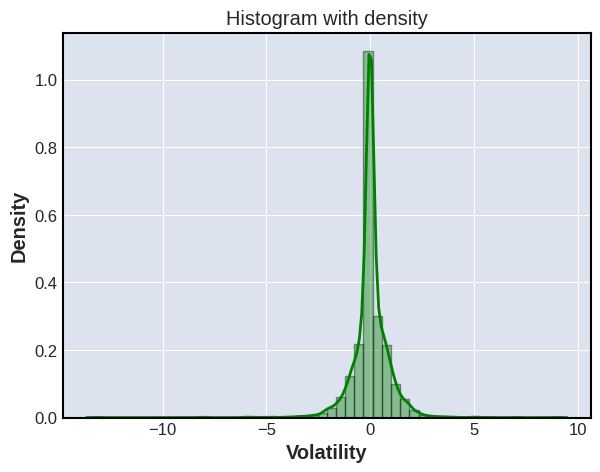

In [68]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
sns.distplot(a=df.Day_Perc_Change, color='green',
             hist_kws={"edgecolor": 'black'})
plt.title("Histogram with density")
plt.xlabel('Volatility')
plt.ylabel('Density')

plt.show()

<Axes: xlabel='Date', ylabel='Day_Perc_Change'>

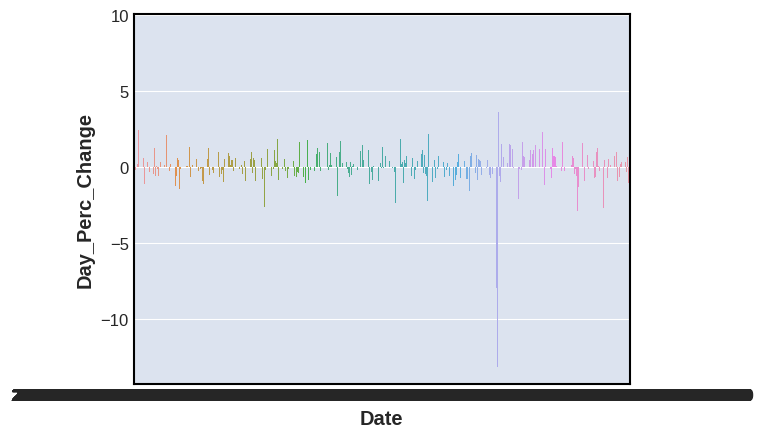

In [69]:
sns.barplot(y = df['Day_Perc_Change'], x = df['Date'])

In [70]:
df['Month_Year'] = df['Date'].apply(lambda x: x.strftime('%B-%Y'))

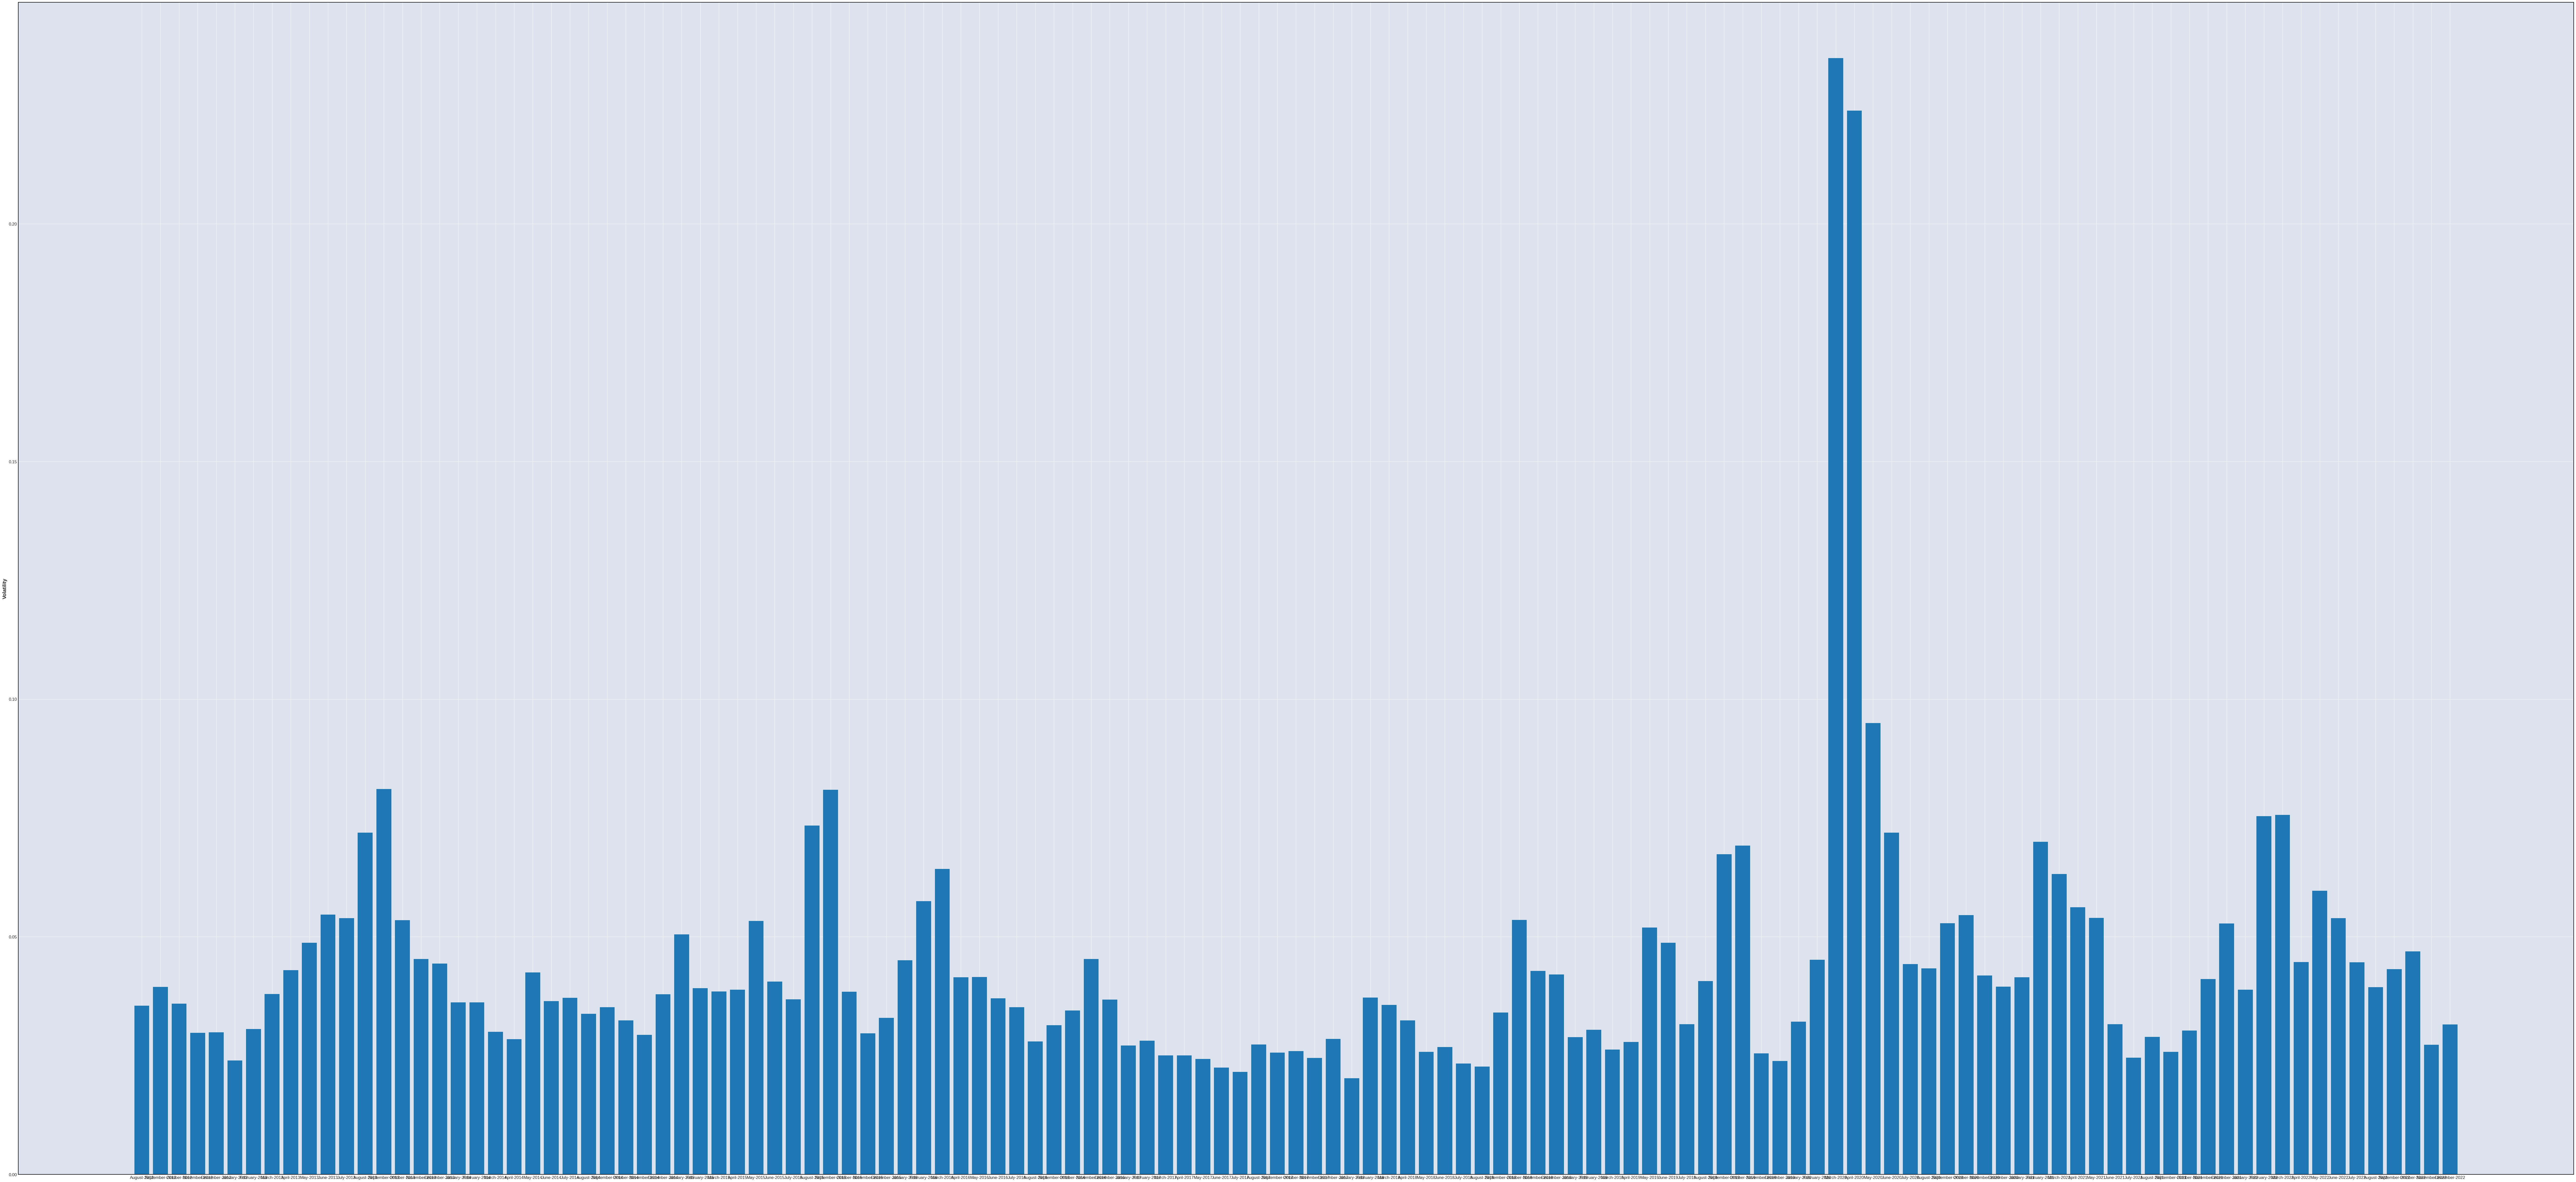

In [71]:
#revenue = msft.financials.loc['Total Revenue']
plt.figure(figsize = (130,60))
plt.bar(df['Month_Year'],df['Volatility'])
plt.ylabel("Volatility")
plt.show()

In [72]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 15.5 MB/s eta 0:00:00


In [73]:
import yfinance as yf
import datetime as dt
import sys
import numpy as np
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn
import pandas as pd
from pandas_datareader import data as web
import seaborn as sns
from pylab import rcParams 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from arch import arch_model
from numpy.linalg import LinAlgError
from scipy import stats
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, q_stat, adfuller
from sklearn.metrics import mean_squared_error
from scipy.stats import probplot, moment
from arch import arch_model
from arch.univariate import ConstantMean, GARCH, Normal
from sklearn.model_selection import TimeSeriesSplit
import warnings

Hurst Exponent function The Hurst Exponent is a statistical measure used to classify time series and infer the level of difficulty in predicting and choosing an appropriate model for the series at hand. The Hurst exponent is used as a measure of long-term memory of time series. It relates to the autocorrelations of the time series, and the rate at which these decrease as the lag between pairs of values increases.

Value near 0.5 indicates a random series. Value near 0 indicates a mean reverting series. Value near 1 indicates a trending series.

In [74]:
def hurst(ts):
    """Returns the Hurst Exponent of the time series vector ts"""
    # Create the range of lag values
    lags = range(2, 100)
    
    # Calculate the array of the variances of the lagged differences
    tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]
    
    # Use a linear fit to estimate the Hurst Exponent
    poly = polyfit(log(lags), log(tau), 1)
    
    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0

Correlogram Plot

In [75]:
def plot_correlogram(x, lags=None, title=None):    
    lags = min(10, int(len(x)/5)) if lags is None else lags
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    x.plot(ax=axes[0][0])
    q_p = np.max(q_stat(acf(x, nlags=lags), len(x))[1])
    stats = f'Q-Stat: {np.max(q_p):>8.2f}\nADF: {adfuller(x)[1]:>11.2f} \nHurst: {round(hurst(x.values),2)}'
    axes[0][0].text(x=.02, y=.85, s=stats, transform=axes[0][0].transAxes)
    probplot(x, plot=axes[0][1])
    mean, var, skew, kurtosis = moment(x, moment=[1, 2, 3, 4])
    s = f'Mean: {mean:>12.2f}\nSD: {np.sqrt(var):>16.2f}\nSkew: {skew:12.2f}\nKurtosis:{kurtosis:9.2f}'
    axes[0][1].text(x=.02, y=.75, s=s, transform=axes[0][1].transAxes)
    plot_acf(x=x, lags=lags, zero=False, ax=axes[1][0])
    plot_pacf(x, lags=lags, zero=False, ax=axes[1][1])
    axes[1][0].set_xlabel('Lag')
    axes[1][1].set_xlabel('Lag')
    fig.suptitle(title, fontsize=20)
    fig.tight_layout()
    fig.subplots_adjust(top=.9)

Download S&P 500 Index Data

We will use daily Sensex returns from 2012-2022 to demonstrate the usage of a GARCH model

List item
List item

```
# This is formatted as code
```



In [76]:
# Define the ticker symbol for Sensex
tickerSymbol = '^BSESN'
# Define the start and end date of the data to be extracted
startDate = '2012-01-01'
endDate = '2023-01-01'

In [77]:
df = yf.download(tickerSymbol, start=startDate, end=endDate)

[*********************100%***********************]  1 of 1 completed


Observe Volatility Clustering


Volatility clustering refers to the observation that "large changes tend to be followed by large changes, of either sign, and small changes tend to be followed by small changes.

Volatility clustering is frequently observed in financial market data, and it poses a challenge for time series modeling. with the S&P 500 daily price dataset we calculate daily returns as the percentage price changes, plot the results and observe its behavior over time.

In [78]:
# Calculate daily returns as percentage price changes
df['Return'] = 100 * (df['Close'].pct_change())
df['Log_Return'] = np.log(df['Close']).diff().mul(100) # rescale to faciliate optimization
df = df.dropna()


In [79]:
df

,Open,High,Low,Close,Adj Close,Volume,Return,Log_Return
Date,,,,,,,,
2012-01-04,15967.490234,16004.690430,15822.320312,15882.639648,15882.639648,17800,-0.355853,-0.356488
2012-01-05,15893.070312,15980.169922,15809.309570,15857.080078,15857.080078,21200,-0.160928,-0.161057
2012-01-06,15789.080078,16001.309570,15664.910156,15867.730469,15867.730469,17200,0.067165,0.067142
2012-01-09,15840.219727,15871.509766,15678.299805,15814.719727,15814.719727,11200,-0.334079,-0.334638
2012-01-10,15898.320312,16180.969727,15898.320312,16165.089844,16165.089844,19600,2.215468,2.191283
...,...,...,...,...,...,...,...,...
2022-12-26,59755.078125,60833.781250,59754.101562,60566.421875,60566.421875,6500,1.204995,1.197793
2022-12-27,60861.410156,60986.679688,60405.660156,60927.429688,60927.429688,11100,0.596053,0.594283
2022-12-28,60811.519531,61075.328125,60713.769531,60910.281250,60910.281250,10000,-0.028146,-0.028150


In [80]:
train = df[:round(0.8*len(df))]
test = df[round(0.8*len(df)):len(df)]

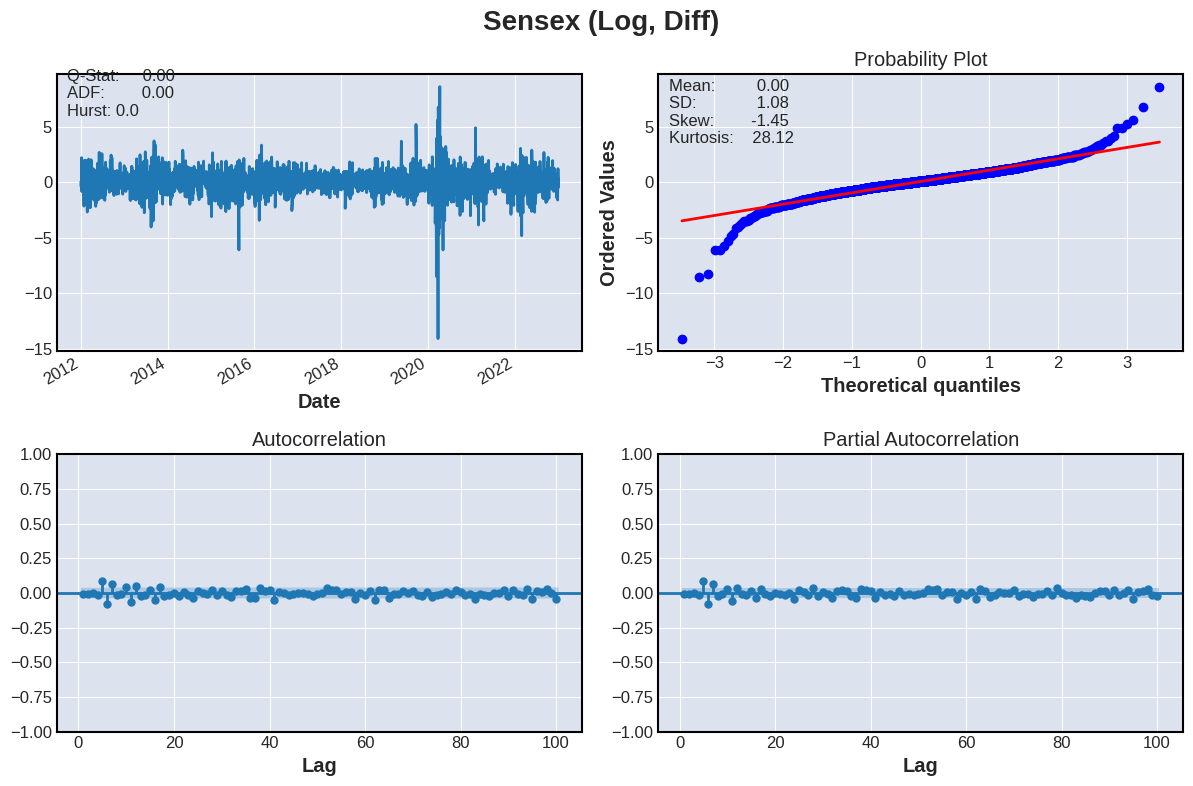

In [81]:
# Plot ACF, PACF and Q-Q plot and get ADF p-value of series
plot_correlogram(df['Log_Return'], lags=100, title='Sensex (Log, Diff)')

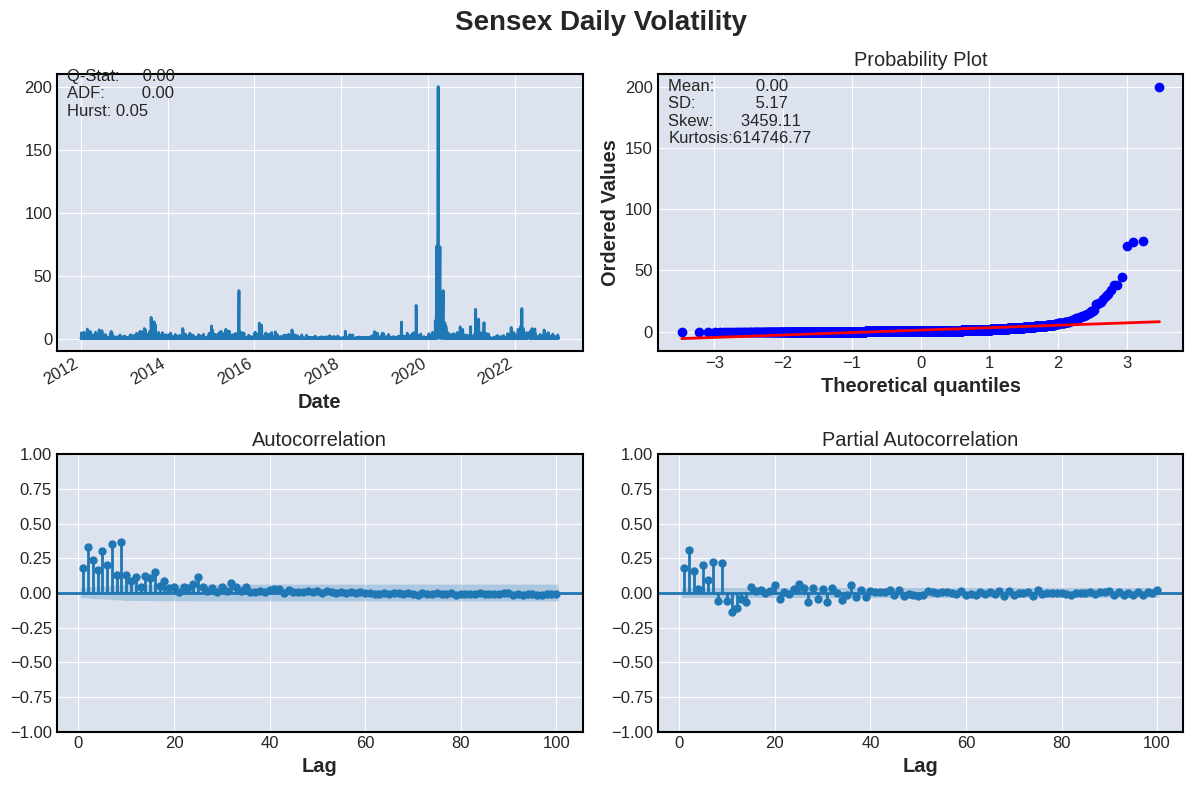

In [82]:
plot_correlogram(df['Log_Return'].sub(df['Log_Return'].mean()).pow(2), lags=100, title='Sensex Daily Volatility')

Calculate volatility

We compute and convert volatility of price returns in Python.

Firstly, we compute the daily volatility as the standard deviation of price returns. Then convert the daily volatility to monthly and annual volatility.

In [83]:
# Calculate daily std of returns
std_daily = df['Return'].std()
print(f'Daily volatility: {round(std_daily,2)}%')

# Convert daily volatility to monthly volatility
std_monthly = np.sqrt(21) * std_daily
print(f'\nMonthly volatility: {round(std_monthly,2)}%')

# Convert daily volatility to annaul volatility
std_annual = np.sqrt(252) * std_daily
print(f'\nAnnual volatility: {round(std_annual,2)}%')

Daily volatility: 1.07%

Monthly volatility: 4.92%

Annual volatility: 17.03%


ARCH and GARCH

First came the ARCH

Auto Regressive Conditional Heteroskedasticity Developed by Robert F. Engle (Nobel prize laureate 2003) Then came the GARCH

"Generalized" ARCH Developed by Tim Bollerslev (Robert F. Engle's student) Model notations Expected return: μ=Expected|rt|I(t−1)

Expected volatility: σ2=Expected[(rt−μt)2|I(t−1)]

Residual (prediction error): rt=μ+ϵt

Volatility is related to the residuals: ϵt=σt∗ζ(WhiteNoise)

White noise (z): Uncorrelated random variables with a zero mean and a finite variance Model intuition Autoregressive: predict future behavior based on past behavior. Volatility as a weighted average of past information. GARCH(1,1) parameter constraints All parameters are non-negative, so the variance cannot be negative. ω,α,β>=0

Model estimations are "mean-reverting" to the long-run variance. α+β<1

long-run variance: ω/(1−α−β)

GARCH(1,1) parameter dynamics The larger the α , the bigger the immediate impact of the shock The larger the β , the longer the duration of the impact Given the GARCH(1,1) model equation as:

GARCH(1,1):σ2t=ω+αϵ2t−1+βσ2t−1

Intuitively, GARCH variance forecast can be interpreted as a weighted average of three different variance forecasts.

One is a constant variance that corresponds to the long run average. The second is the new information that was not available when the previous forecast was made. The third is the forecast that was made in the previous period. The weights on these three forecasts determine how fast the variance changes with new information and how fast it reverts to its long run mean.

Simulate ARCH and GARCH series We will simulate an ARCH(1) and GARCH(1,1) time series respectively using a function simulate_GARCH(n, omega, alpha, beta = 0).

Recall the difference between an ARCH(1) and a GARCH(1,1) model is: besides an autoregressive component of α multiplying lag-1 residual squared, a GARCH model includes a moving average component of β multiplying lag-1 variance.

The function will simulate an ARCH/GARCH series based on n (number of simulations), omega, alpha, and beta (0 by default) you specify. It will return simulated residuals and variances.

In [84]:
# Specify GARCH model assumptions
basic_gm = arch_model(train['Return'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')
# Fit the model
gm_result = basic_gm.fit(update_freq = 4)

Iteration:      4,   Func. Count:     29,   Neg. LLF: 3547.669809030418
Iteration:      8,   Func. Count:     55,   Neg. LLF: 2859.747308804706
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2859.7472762535467
            Iterations: 10
            Function evaluations: 64
            Gradient evaluations: 10


In [85]:
# Display model fitting summary
print(gm_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2859.75
Distribution:                  Normal   AIC:                           5727.49
Method:            Maximum Likelihood   BIC:                           5750.20
                                        No. Observations:                 2159
Date:                Tue, May 30 2023   Df Residuals:                     2158
Time:                        09:00:59   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0749  1.848e-02      4.053  5.057e-05 [3.868e-0

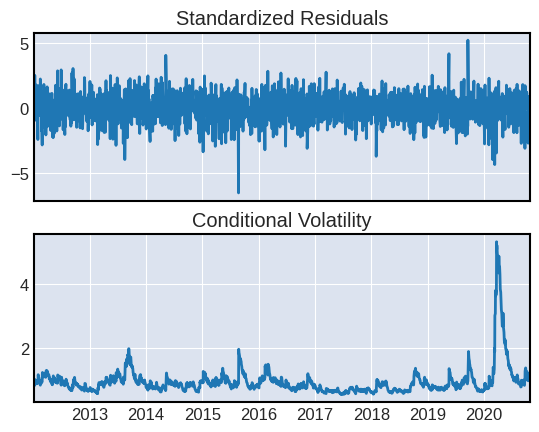

In [86]:
# Plot fitted results
gm_result.plot()
plt.show()

Make forecast with GARCH models

We will practice making a basic volatility forecast.

We will call .forecast() to make a prediction. By default it produces a 1-step ahead estimate. You can use horizon = n to specify longer forward periods.

In [87]:
# Make 5-period ahead forecast
gm_forecast = gm_result.forecast(horizon = 5)

# Print the forecast variance
print(gm_forecast.variance[-1:])

                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2020-10-26  1.062717  1.061871  1.061045  1.060237  1.059448


Distribution assumptions

Why make assumptions?

Volatility is not directly observable GARCH model use residuals as volatility shocks rt=μ+t+ϵt

Volatility is related to the residuals: ϵt=σt∗ζ(WhiteNoise)

Standardized residuals

Residual = predicted return - mean return residuals=ϵt=rt−μt

Standardized residual = residual / return volatility stdResid=ϵtσt

GARCH models make distribution assumptions about the residuals and the mean return. Financial time series data often does not follow a normal distribution. In financial time series it is much more likely to observe extreme positive and negative values that are far away from the mean. to improve a GARCH models distribution assumptions to be more representative of real financial data we can specify the models distribution assumption to be a Student's t-distribution. A Student's t-distribution is symmetric and bell shaped similar to a normal distribution but has fatter tails making it more prone to producing values that fall far away from its mean. The nu (ν) parameter indicates its shape the larger the ν the more peaked the curve becomes.

GARCH models enable one to specify the distribution assumptions of the standardized residuals. By default, a normal distribution is assumed, which has a symmetric, bell-shaped probability density curve. Other options include Student's t-distribution and skewed Student's t-distribution.

Plot distribution of standardized residuals We will practice computing the standardized residuals from a fitted GARCH model, and then plot its histogram together with a normal fit distribution normal_resid.

Plot distribution of standardized residuals

We will practice computing the standardized residuals from a fitted GARCH model, and then plot its histogram together with a normal fit distribution normal_resid.

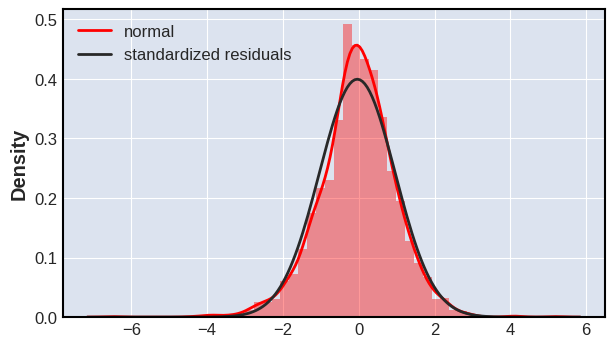

In [88]:
# Obtain model estimated residuals and volatility
gm_resid = gm_result.resid
gm_std = gm_result.conditional_volatility

# Calculate the standardized residuals
gm_std_resid = gm_resid /gm_std

# Plot the histogram of the standardized residuals
plt.figure(figsize=(7,4))
sns.distplot(gm_std_resid, norm_hist=True, fit=stats.norm, bins=50, color='r')
plt.legend(('normal', 'standardized residuals'))
plt.show()

In [89]:
import numpy as np
import pandas as pd
import os, datetime
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
print('Tensorflow version: {}'.format(tf.__version__))

import matplotlib.pyplot as plt
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')
import yfinance as yf
from sklearn.metrics import mean_squared_error, mean_absolute_error

Tensorflow version: 2.12.0


In [90]:
batch_size = 32
seq_len = 128

d_k = 256
d_v = 256
n_heads = 13
ff_dim = 256

In [91]:
# Define the ticker symbol for Sensex
tickerSymbol = '^BSESN'
# Define the start and end date of the data to be extracted
startDate = '2012-01-01'
endDate = '2023-01-01'

In [92]:
df = yf.download(tickerSymbol, start=startDate, end=endDate)

[*********************100%***********************]  1 of 1 completed


In [93]:
# Calculate daily returns of Sensex
df['Returns'] = np.log(df['Close']/df['Close'].shift(1))

In [94]:
# Calculate volatility (standard deviation of returns)
df['Volatility'] = df['Returns'].rolling(window=20).std() * np.sqrt(20)

In [95]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Volatility
Date,,,,,,,,
2012-01-03,15640.559570,15970.309570,15640.559570,15939.360352,15939.360352,16200,NaN,NaN
2012-01-04,15967.490234,16004.690430,15822.320312,15882.639648,15882.639648,17800,-0.003565,NaN
2012-01-05,15893.070312,15980.169922,15809.309570,15857.080078,15857.080078,21200,-0.001611,NaN
2012-01-06,15789.080078,16001.309570,15664.910156,15867.730469,15867.730469,17200,0.000671,NaN
2012-01-09,15840.219727,15871.509766,15678.299805,15814.719727,15814.719727,11200,-0.003346,NaN


In [96]:
df.to_csv('sensex.csv')

In [97]:
df = pd.read_csv('sensex.csv',parse_dates=['Date'])

In [98]:
# Replace 0 to avoid dividing by 0 later on
df['Volume'].replace(to_replace=0, method='ffill', inplace=True) 
df.sort_values('Date', inplace=True)

In [99]:
df = df.set_index('Date')

In [100]:
df = df.resample('D').bfill()

In [101]:
df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns', 'Volatility','Durations' ]] = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns', 'Volatility', 'Durations']].rolling(20).mean() 

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4016 entries, 2012-01-02 to 2022-12-30
Freq: D
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        3997 non-null   float64
 1   High        3997 non-null   float64
 2   Low         3997 non-null   float64
 3   Close       3997 non-null   float64
 4   Adj Close   3997 non-null   float64
 5   Volume      3997 non-null   float64
 6   Returns     3977 non-null   float64
 7   Volatility  3804 non-null   float64
 8   Durations   3997 non-null   float64
dtypes: float64(9)
memory usage: 313.8 KB


In [103]:
df = df.dropna()

In [104]:
df = df.reset_index()

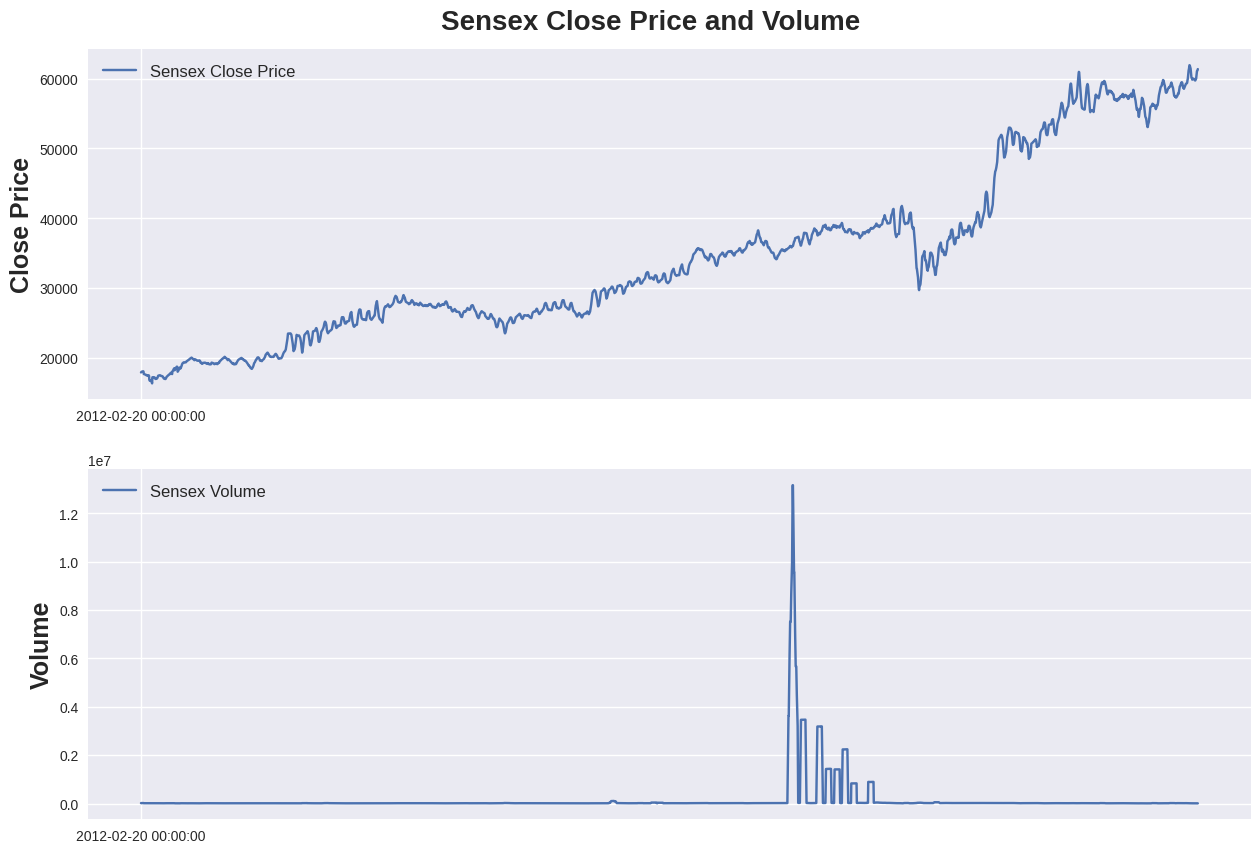

In [105]:
fig = plt.figure(figsize=(15,10))
st = fig.suptitle("Sensex Close Price and Volume", fontsize=20)
st.set_y(0.92)

ax1 = fig.add_subplot(211)
ax1.plot(df['Close'], label='Sensex Close Price')
ax1.set_xticks(range(0, df.shape[0], 3804))
ax1.set_xticklabels(df['Date'].loc[::3804])
ax1.set_ylabel('Close Price', fontsize=18)
ax1.legend(loc="upper left", fontsize=12)

ax2 = fig.add_subplot(212)
ax2.plot(df['Volume'], label='Sensex Volume')
ax2.set_xticks(range(0, df.shape[0], 3804))
ax2.set_xticklabels(df['Date'].loc[::3804])
ax2.set_ylabel('Volume', fontsize=18)
ax2.legend(loc="upper left", fontsize=12)

In [106]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [107]:
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
X_data = pd.DataFrame(X_scaler.fit_transform(df[['Open','High', 'Low','Close','Adj Close','Volume','Returns','Volatility','Durations']]))
X_data.columns = ['Open','High', 'Low','Close','Adj Close','Volume','Returns','Volatility', 'Durations']
#df.head()
train_size = round(0.8*len(df))
val_size = round(0.9*len(df))
test_size = len(df)

df_train,df_val, df_test = pd.DataFrame(X_data[:train_size]), pd.DataFrame(X_data[train_size:val_size]), pd.DataFrame(X_data[val_size:test_size])

# Remove date column
#df_train.drop(columns=['Date'], inplace=True)
#df_val.drop(columns=['Date'], inplace=True)
#df_test.drop(columns=['Date'], inplace=True)

# Convert pandas columns into arrays
train_data = df_train.values
val_data = df_val.values
test_data = df_test.values
print('Training data shape: {}'.format(train_data.shape))
print('Validation data shape: {}'.format(val_data.shape))
print('Test data shape: {}'.format(test_data.shape))

df_train.head()

Training data shape: (3043, 9)
Validation data shape: (381, 9)
Test data shape: (380, 9)


,Open,High,Low,Close,Adj Close,Volume,Returns,Volatility,Durations
0,0.033895,0.033231,0.034856,0.034380,0.034380,0.000805,0.834905,0.134969,0.0
1,0.034848,0.034290,0.035943,0.035475,0.035475,0.000781,0.834933,0.133731,0.0
2,0.036007,0.035408,0.036811,0.036258,0.036258,0.000760,0.810216,0.133882,0.0
3,0.036520,0.035975,0.037363,0.036744,0.036744,0.000770,0.803048,0.132863,0.0
4,0.037234,0.036707,0.037878,0.037233,0.037233,0.000807,0.789275,0.128942,0.0


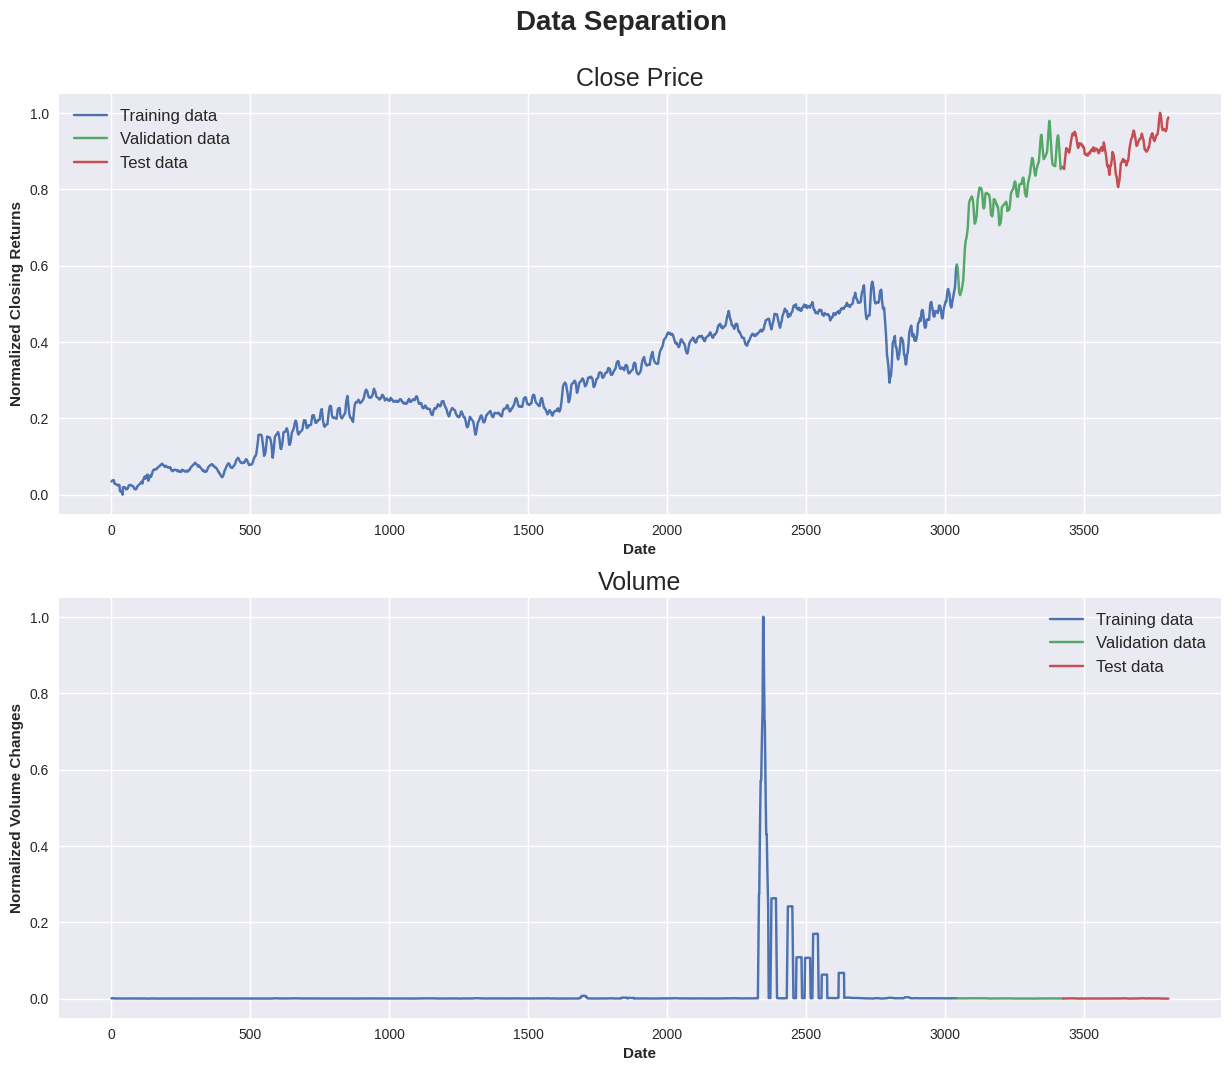

In [108]:

fig = plt.figure(figsize=(15,12))
st = fig.suptitle("Data Separation", fontsize=20)
st.set_y(0.95)

###############################################################################

ax1 = fig.add_subplot(211)
ax1.plot(np.arange(train_data.shape[0]), df_train['Close'], label='Training data')

ax1.plot(np.arange(train_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]), df_val['Close'], label='Validation data')

ax1.plot(np.arange(train_data.shape[0]+val_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['Close'], label='Test data')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Closing Returns')
ax1.set_title("Close Price", fontsize=18)
ax1.legend(loc="best", fontsize=12)

###############################################################################

ax2 = fig.add_subplot(212)
ax2.plot(np.arange(train_data.shape[0]), df_train['Volume'], label='Training data')

ax2.plot(np.arange(train_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]), df_val['Volume'], label='Validation data')

ax2.plot(np.arange(train_data.shape[0]+val_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['Volume'], label='Test data')
ax2.set_xlabel('Date')
ax2.set_ylabel('Normalized Volume Changes')
ax2.set_title("Volume", fontsize=18)
ax2.legend(loc="best", fontsize=12)

In [109]:
# Training data
X_train, y_train = [], []
for i in range(seq_len, len(train_data)):
  X_train.append(train_data[i-seq_len:i]) # Chunks of training data with a length of 128 df-rows
  y_train.append(train_data[:, 7][i]) #Value of 4th column (Close Price) of df-row 128+1
X_train, y_train = np.array(X_train), np.array(y_train)

###############################################################################

# Validation data
X_val, y_val = [], []
for i in range(seq_len, len(val_data)):
    X_val.append(val_data[i-seq_len:i])
    y_val.append(val_data[:, 7][i])
X_val, y_val = np.array(X_val), np.array(y_val)

###############################################################################

# Test data
X_test, y_test = [], []
for i in range(seq_len, len(test_data)):
    X_test.append(test_data[i-seq_len:i])
    y_test.append(test_data[:, 7][i])    
X_test, y_test = np.array(X_test), np.array(y_test)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(2915, 128, 9) (2915,)
(253, 128, 9) (253,)


In [110]:
class Time2Vector(Layer):
  def __init__(self, seq_len, **kwargs):
    super(Time2Vector, self).__init__()
    self.seq_len = seq_len

  def build(self, input_shape):
    '''Initialize weights and biases with shape (batch, seq_len)'''
    self.weights_linear = self.add_weight(name='weight_linear',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)
    
    self.bias_linear = self.add_weight(name='bias_linear',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)
    
    self.weights_periodic = self.add_weight(name='weight_periodic',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

    self.bias_periodic = self.add_weight(name='bias_periodic',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

  def call(self, x):
    '''Calculate linear and periodic time features'''
    x = tf.math.reduce_mean(x[:,:,:4], axis=-1) 
    time_linear = self.weights_linear * x + self.bias_linear # Linear time feature
    time_linear = tf.expand_dims(time_linear, axis=-1) # Add dimension (batch, seq_len, 1)
    
    time_periodic = tf.math.sin(tf.multiply(x, self.weights_periodic) + self.bias_periodic)
    time_periodic = tf.expand_dims(time_periodic, axis=-1) # Add dimension (batch, seq_len, 1)
    return tf.concat([time_linear, time_periodic], axis=-1) # shape = (batch, seq_len, 2)
   
  def get_config(self): # Needed for saving and loading model with custom layer
    config = super().get_config().copy()
    config.update({'seq_len': self.seq_len})
    return config

In [112]:
class SingleAttention(Layer):
  def __init__(self, d_k, d_v):
    super(SingleAttention, self).__init__()
    self.d_k = d_k
    self.d_v = d_v

  def build(self, input_shape):
    self.query = Dense(self.d_k, 
                       input_shape=input_shape, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='glorot_uniform')
    
    self.key = Dense(self.d_k, 
                     input_shape=input_shape, 
                     kernel_initializer='glorot_uniform', 
                     bias_initializer='glorot_uniform')
    
    self.value = Dense(self.d_v, 
                       input_shape=input_shape, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='glorot_uniform')

  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)
    q = self.query(inputs[0])
    k = self.key(inputs[1])

    attn_weights = tf.matmul(q, k, transpose_b=True)
    attn_weights = tf.map_fn(lambda x: x/np.sqrt(self.d_k), attn_weights)
    attn_weights = tf.nn.softmax(attn_weights, axis=-1)
    
    v = self.value(inputs[2])
    attn_out = tf.matmul(attn_weights, v)
    return attn_out    

#############################################################################

class MultiAttention(Layer):
  def __init__(self, d_k, d_v, n_heads):
    super(MultiAttention, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.attn_heads = list()

  def build(self, input_shape):
    for n in range(self.n_heads):
      self.attn_heads.append(SingleAttention(self.d_k, self.d_v))  
    
    # input_shape[0]=(batch, seq_len, 7), input_shape[0][-1]=7 
    self.linear = Dense(input_shape[0][-1], 
                        input_shape=input_shape, 
                        kernel_initializer='glorot_uniform', 
                        bias_initializer='glorot_uniform')

  def call(self, inputs):
    attn = [self.attn_heads[i](inputs) for i in range(self.n_heads)]
    concat_attn = tf.concat(attn, axis=-1)
    multi_linear = self.linear(concat_attn)
    return multi_linear   

#############################################################################

class TransformerEncoder(Layer):
  def __init__(self, d_k, d_v, n_heads, ff_dim, dropout=0.1, **kwargs):
    super(TransformerEncoder, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.ff_dim = ff_dim
    self.attn_heads = list()
    self.dropout_rate = dropout

  def build(self, input_shape):
    self.attn_multi = MultiAttention(self.d_k, self.d_v, self.n_heads)
    self.attn_dropout = Dropout(self.dropout_rate)
    self.attn_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)

    self.ff_conv1D_1 = Conv1D(filters=self.ff_dim, kernel_size=1, activation='tanh') #relu
    # input_shape[0]=(batch, seq_len, 7), input_shape[0][-1] = 7 
    self.ff_conv1D_2 = Conv1D(filters=input_shape[0][-1], kernel_size=1) 
    self.ff_dropout = Dropout(self.dropout_rate)
    self.ff_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)    
  
  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)
    attn_layer = self.attn_multi(inputs)
    attn_layer = self.attn_dropout(attn_layer)
    attn_layer = self.attn_normalize(inputs[0] + attn_layer)

    ff_layer = self.ff_conv1D_1(attn_layer)
    ff_layer = self.ff_conv1D_2(ff_layer)
    ff_layer = self.ff_dropout(ff_layer)
    ff_layer = self.ff_normalize(inputs[0] + ff_layer)
    return ff_layer 

  def get_config(self): # Needed for saving and loading model with custom layer
    config = super().get_config().copy()
    config.update({'d_k': self.d_k,
                   'd_v': self.d_v,
                   'n_heads': self.n_heads,
                   'ff_dim': self.ff_dim,
                   'attn_heads': self.attn_heads,
                   'dropout_rate': self.dropout_rate})
    return config          


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 9)]     0           []                               
                                                                                                  
 time2_vector_1 (Time2Vector)   (None, 128, 2)       512         ['input_1[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 128, 11)      0           ['input_1[0][0]',                
                                                                  'time2_vector_1[0][0]']         
                                                                                                  
 transformer_encoder (Transform  (None, 128, 11)     162370      ['concatenate[0][0]',        

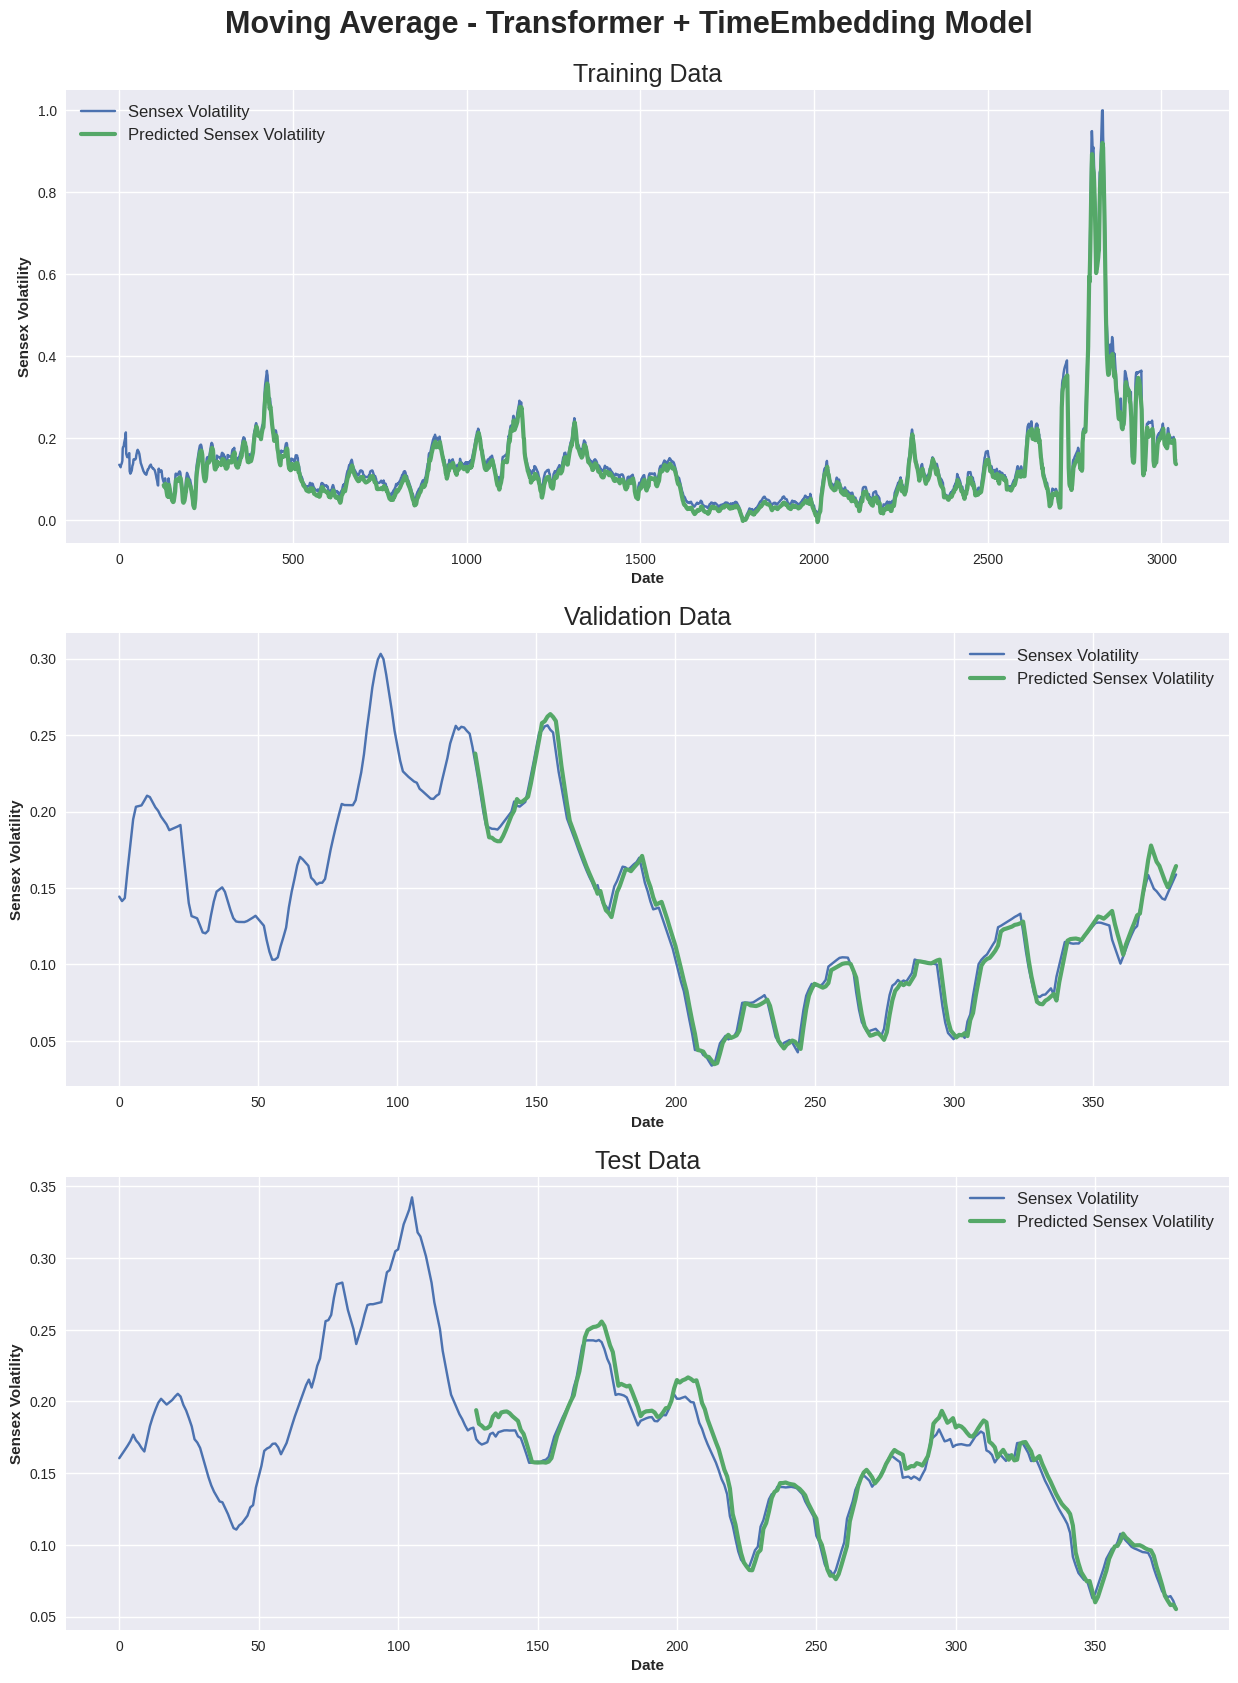

In [113]:
def create_model():
  '''Initialize time and transformer layers'''
  time_embedding = Time2Vector(seq_len)
  attn_layer1 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer2 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer3 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer4 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)

  '''Construct model'''
  in_seq = Input(shape=(seq_len, 9))
  x = time_embedding(in_seq)
  x = Concatenate(axis=-1)([in_seq, x])
  x = attn_layer1((x, x, x))
 #x = attn_layer2((x, x, x))
 #x = attn_layer3((x, x, x))
 #x = attn_layer4((x, x, x))
  x = GlobalAveragePooling1D(data_format='channels_first')(x)
  #x = Dropout(0.1)(x)
  #x = Dense(64, activation='relu')(x)
  #x = Dense(64, activation='relu')(x)
  x = Dropout(0.1)(x)
  out = Dense(1, activation='linear')(x)

  model = Model(inputs=in_seq, outputs=out)
  model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])
  return model


model = create_model()
model.summary()

callback = tf.keras.callbacks.ModelCheckpoint('Transformer+TimeEmbedding.hdf5', 
                                              monitor='val_loss', 
                                              save_best_only=True, 
                                              verbose=1)

history = model.fit(X_train, y_train, 
                    batch_size=batch_size, 
                    epochs=100, 
                    callbacks=[callback],
                    validation_data=(X_val, y_val))  

model = tf.keras.models.load_model('/content/Transformer+TimeEmbedding.hdf5',
                                   custom_objects={'Time2Vector': Time2Vector, 
                                                   'SingleAttention': SingleAttention,
                                                   'MultiAttention': MultiAttention,
                                                   'TransformerEncoder': TransformerEncoder})


###############################################################################
'''Calculate predictions and metrics'''

#Calculate predication for training, validation and test data
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)

#Print evaluation metrics for all datasets
train_eval = model.evaluate(X_train, y_train, verbose=0)
val_eval = model.evaluate(X_val, y_val, verbose=0)
test_eval = model.evaluate(X_test, y_test, verbose=0)
print(' ')
print('Evaluation metrics')
print('Training Data - Loss: {:.4f}, MAE: {:.4f}, MSE: {:.4f}'.format(train_eval[0], train_eval[1], train_eval[2]))
print('Validation Data - Loss: {:.4f}, MAE: {:.4f}, MSE: {:.4f}'.format(val_eval[0], val_eval[1], val_eval[2]))
print('Test Data - Loss: {:.4f}, MAE: {:.4f}, MSE: {:.4f}'.format(test_eval[0], test_eval[1], test_eval[2]))

###############################################################################
'''Display results'''

fig = plt.figure(figsize=(15,20))
st = fig.suptitle("Moving Average - Transformer + TimeEmbedding Model", fontsize=22)
st.set_y(0.92)

#Plot training data results
ax11 = fig.add_subplot(311)
ax11.plot(train_data[:, 7], label='Sensex Volatility')
ax11.plot(np.arange(seq_len, train_pred.shape[0]+seq_len), train_pred, linewidth=3, label='Predicted Sensex Volatility') 
ax11.set_title("Training Data", fontsize=18)
ax11.set_xlabel('Date')
ax11.set_ylabel('Sensex Volatility')
ax11.legend(loc="best", fontsize=12)

#Plot validation data results
ax21 = fig.add_subplot(312)
ax21.plot(val_data[:, 7], label='Sensex Volatility')
ax21.plot(np.arange(seq_len, val_pred.shape[0]+seq_len), val_pred, linewidth=3, label='Predicted Sensex Volatility') #+seq_len
ax21.set_title("Validation Data", fontsize=18)
ax21.set_xlabel('Date')
ax21.set_ylabel('Sensex Volatility')
ax21.legend(loc="best", fontsize=12)

#Plot test data results
ax31 = fig.add_subplot(313)
ax31.plot(test_data[:, 7], label='Sensex Volatility')
ax31.plot(np.arange(seq_len, test_pred.shape[0] + seq_len), test_pred, linewidth=3, label='Predicted Sensex Volatility') #+seq_len
ax31.set_title("Test Data", fontsize=18)
ax31.set_xlabel('Date')
ax31.set_ylabel('Sensex Volatility')
ax31.legend(loc="best", fontsize=12)

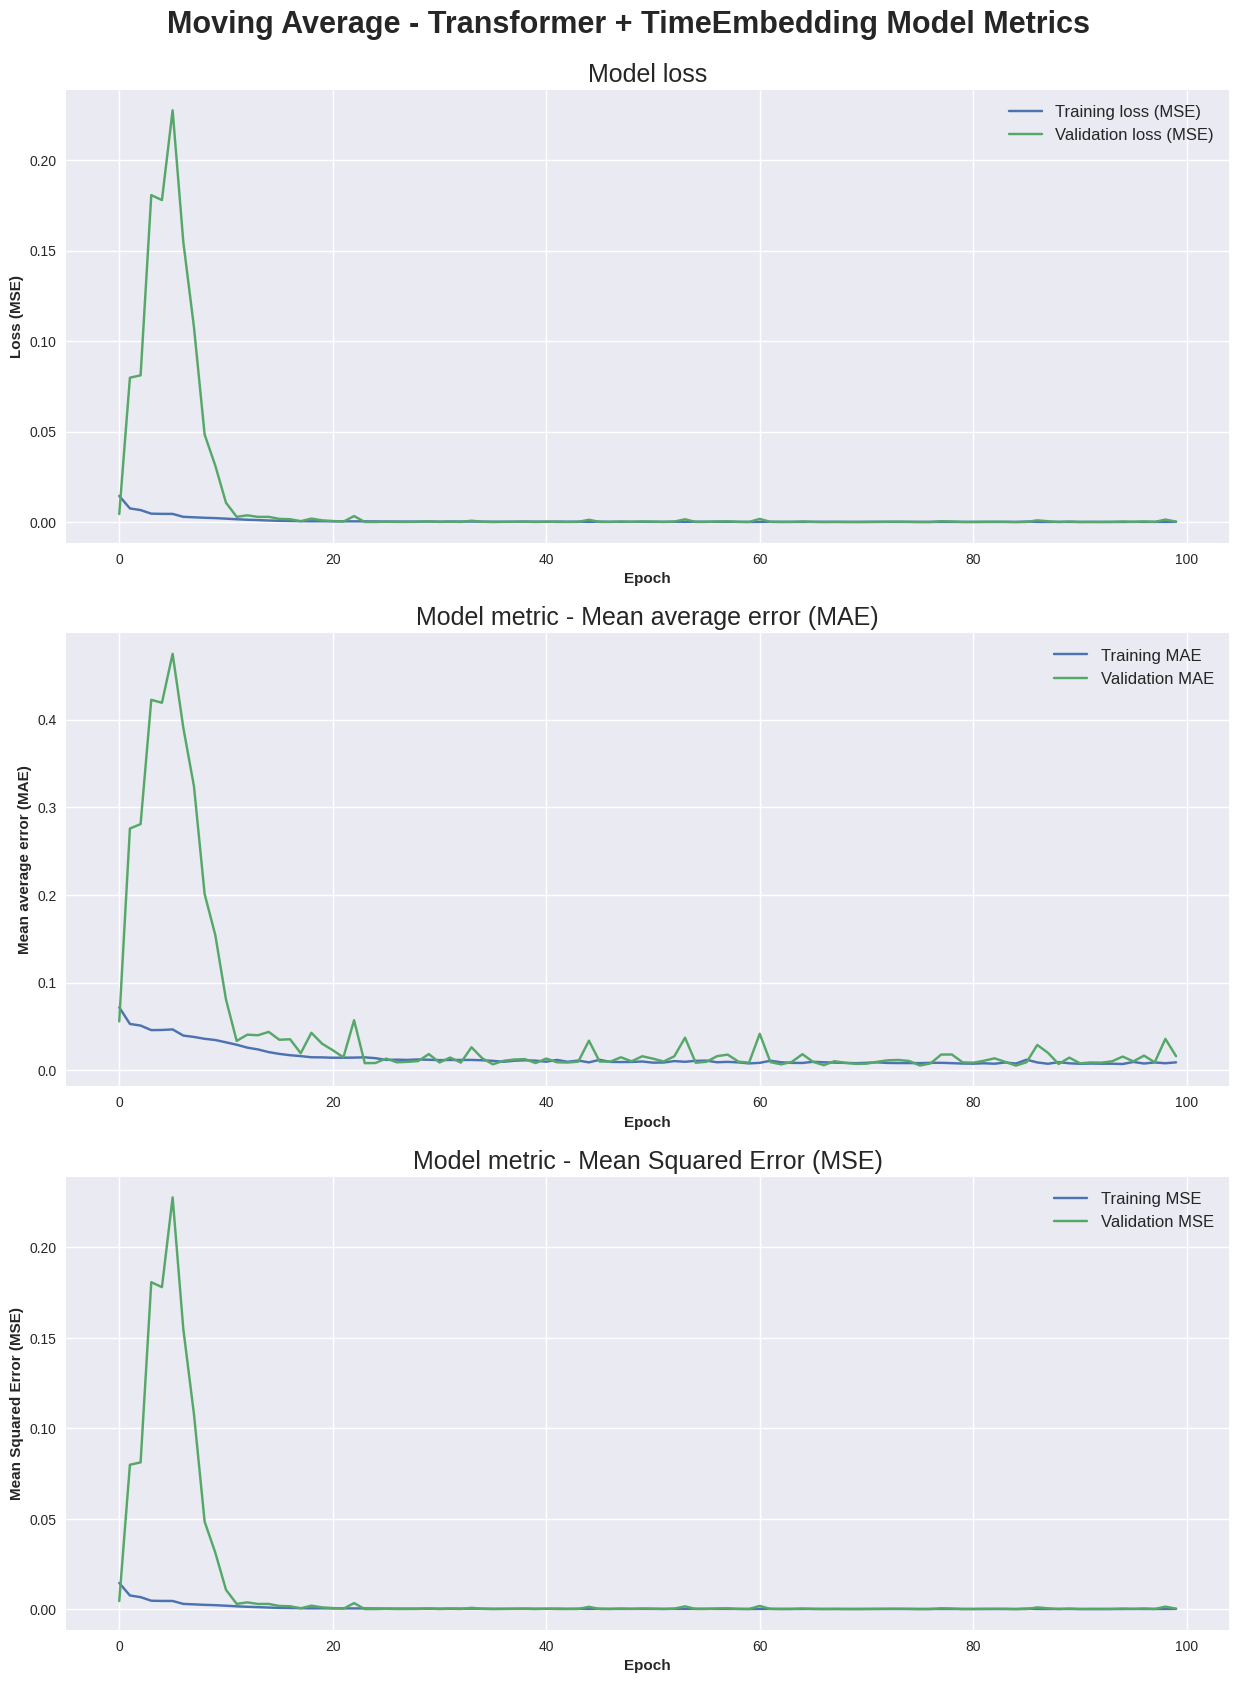

In [114]:
'''Display model metrics'''

fig = plt.figure(figsize=(15,20))
st = fig.suptitle("Moving Average - Transformer + TimeEmbedding Model Metrics", fontsize=22)
st.set_y(0.92)

#Plot model loss
ax1 = fig.add_subplot(311)
ax1.plot(history.history['loss'], label='Training loss (MSE)')
ax1.plot(history.history['val_loss'], label='Validation loss (MSE)')
ax1.set_title("Model loss", fontsize=18)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss (MSE)')
ax1.legend(loc="best", fontsize=12)

#Plot MAE
ax2 = fig.add_subplot(312)
ax2.plot(history.history['mae'], label='Training MAE')
ax2.plot(history.history['val_mae'], label='Validation MAE')
ax2.set_title("Model metric - Mean average error (MAE)", fontsize=18)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Mean average error (MAE)')
ax2.legend(loc="best", fontsize=12)

#Plot MAPE
ax3 = fig.add_subplot(313)
ax3.plot(history.history['mse'], label='Training MSE')
ax3.plot(history.history['val_mse'], label='Validation MSE')
ax3.set_title("Model metric - Mean Squared Error (MSE)", fontsize=18)
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Mean Squared Error (MSE)')
ax3.legend(loc="best", fontsize=12)

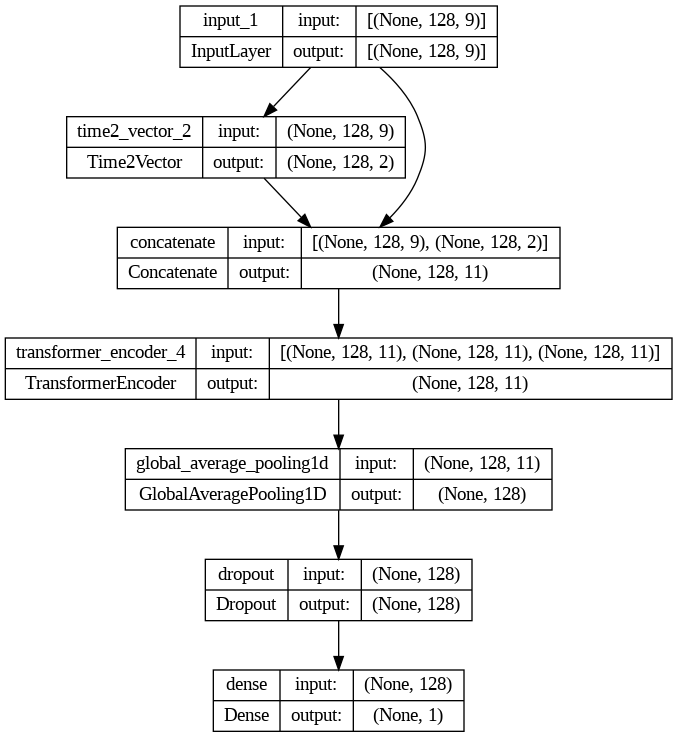

In [115]:
tf.keras.utils.plot_model(
    model,
    to_file="IBM_Transformer+TimeEmbedding.png",
    show_shapes=True,
    show_layer_names=True,
    expand_nested=True,
    dpi=96,)